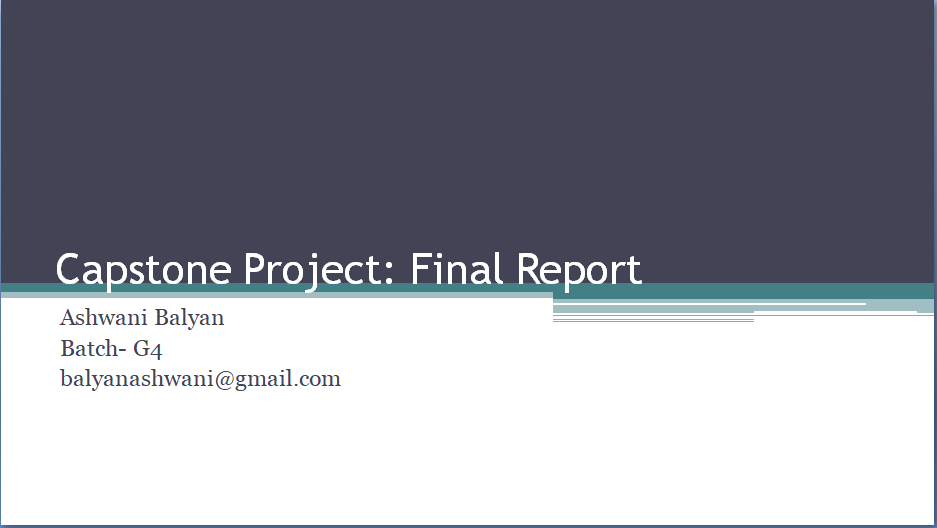
                                                           

# 1. Introduction


## 1.1 Brief introduction about the problem statement and the need of solving it.


### 1.1.1 Problem statement

BCCI has hired an external analytics consulting firm for data analytics. The major objective of 
this tie up is to extract actionable insights from the historical match data and make strategic 
changes to make India win. Primary objective is to create Machine Learning models which 
correctly predicts a win for the Indian Cricket Team. Once a model is developed then we have 
to extract actionable insights and recommendation.

Below are the details of the next 5 matches, India is going to play. We have to predict the 
result of the matches and if we are getting prediction as a Loss then suggest some changes and 
re-run our model again until we are getting Win as a prediction. We cannot use the same 
strategy in the entire series, because opponent will get to know our strategy and they can come 
with counter strategy. Hence for all the below 5 matches we have to suggest unique strategies to 
make India win. The suggestions should be in-line with the variables that have been mentioned 
in the given data set. The feasibility of the suggestions is to be considered very carefully as well.

1. 1 Test match with England in England. All the match are day matches. In England, it will be 
rainy season at the time to match.

2. 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will 
be winter season at the time to match.

3. 2 ODI match with Sri Lanka in India. All the match are Day and Night matches. In India, it 
will be winter season at the time to match

### 1.1.2 Need of the study/project

India has the highest fan following of cricket in the world. It would not be wrong to say that nearly every person in India has, atleast once, watched the cricket match on television or heared commentary on FM/Radio. If not this, then he or she must have atleast heared from someone about India winning or losing a cricket match.

So, India losing a cricket match breaks a lot of hearts. Above this, it is a matter of national pride to win a cricket match or winning in any other international sports. 

Hence, It would be of great importance, if a machine learning model can predict the win or loss of Indian Cricket Team and provide suitable actions beforehand if loss is predicted.

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_excel('Sports Data.xlsx',sheet_name=1)
df_Dict=pd.read_excel('Sports Data.xlsx',sheet_name=0)

In [3]:
df_Dict=pd.read_excel('Sports Data.xlsx',sheet_name=0)

#### 

#### Data dictionary

In [4]:
df_Dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,Variables,Description
1,NaN,Game_number,Unique ID for each match
2,NaN,Result,Final result of the match
3,NaN,Avg_team_Age,Average age of the playing 11 players for that match
4,NaN,Match_light_type,"type of match: Day, night or day & night"
5,NaN,Match_format,"Format of the match: T20, ODI or test"
6,NaN,Bowlers_in_team,how many full time bowlers has been player in the team
7,NaN,Wicket_keeper_in_team,how many full time wicket keeper has been player in the team
8,NaN,All_rounder_in_team,how many full time all rounder has been player in the team
9,NaN,First_selection,First inning of team: batting or bowling


* The data seems to be collected from past matches of Indian Cricket Team with other international teams.
* As the date of the cricket matches is not mentioned in data, so it is not possoible to be sure about the frequency of data collection.
* The data collection methodology seems to be observational and derived/compiled as the mentioned features are observable during and after repective cricket matches. 
* The data is quantitative and seems to be a secondary data. There are many firms collecting the sports data and the same is available through them on internet. Also, there are analysts teams collecting the cricket match data data for news/sports channels.  

#### First five rows of data (Transposed)

In [5]:
df.head().T

,0,1,2,3,4
Game_number,Game_1,Game_2,Game_3,Game_4,Game_5
Result,Loss,Win,Loss,Win,Loss
Avg_team_Age,18.0,24.0,24.0,24.0,24.0
Match_light_type,Day,Day,Day and Night,NaN,Night
Match_format,ODI,T20,T20,ODI,ODI
Bowlers_in_team,3.0,3.0,3.0,2.0,1.0
Wicket_keeper_in_team,1,1,1,1,1
All_rounder_in_team,3.0,4.0,2.0,2.0,3.0
First_selection,Bowling,Batting,Bowling,Bowling,Bowling
Opponent,Srilanka,Zimbabwe,Zimbabwe,Kenya,Srilanka


####  Last five rows of data (Transposed)

In [6]:
df.tail().T

,2925,2926,2927,2928,2929
Game_number,Game_2926,Game_2927,Game_2928,Game_2929,Game_2930
Result,Win,Win,Win,Win,Win
Avg_team_Age,30.0,30.0,30.0,30.0,30.0
Match_light_type,Day,Day,Day and Night,Day,Day
Match_format,T20,ODI,ODI,ODI,ODI
Bowlers_in_team,3.0,4.0,4.0,4.0,4.0
Wicket_keeper_in_team,1,1,1,1,1
All_rounder_in_team,4.0,3.0,3.0,3.0,3.0
First_selection,Batting,Bowling,Bowling,Batting,Batting
Opponent,South Africa,Kenya,Pakistan,Kenya,Kenya


#### Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

* There are total 2930 rows from 0 to 2929
* There are total 23 columns with;

      * Nine features of float data type
      * Four features of integer data type.
      * Ten features of object data type.
* Null values are present in many columns
* There seems some problem in below given features as these must be numerical and the data type should not be object type:

      * 'Players_scored_zero'
      * 'player_highest_wicket'

#### Checking for duplicate rows

In [8]:
df.duplicated().sum()

0

* No duplicate rows present in data

##### Data description of Numerical features

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


#####  Points to be checked
* Avg_team_Age min value is 12 and max is 70. This is not possible and to be checked.
* Extra_bowls_bowled max is 40. This is either a bad data or an outlier. To be checked
* Max_run_given_1over is 40 though 75% values for this feature are near to 9. So, must be bad data or an outlier. To be     checked.
* The feature 'Wicket_keeper_in_team' has only one value throughout, with mean=1 and std deviation = 0. Hence, we will need to remove this column under the unwanted columns treatment.
* The feature 'Game_number' is representing a serial number and thus is an unwanted feature. Required to be removed.




#####   Data description of Categorical features

In [10]:
df.describe(include= ['object']).T

,count,unique,top,freq
Game_number,2930,2930,Game_503,1
Result,2930,2,Win,2457
Match_light_type,2878,3,Day,2041
Match_format,2860,4,ODI,1865
First_selection,2871,3,Bowling,1722
Opponent,2894,9,South Africa,640
Season,2868,3,Rainy,1309
Offshore,2866,2,No,2057
Players_scored_zero,2930,5,3,1730
player_highest_wicket,2930,6,1,1084


#####  Points to be noted:
* The frequency for top categories shows that:

  * for 'Win' it is 2457 out of total 2930, which indicates that in most of the matches, in given data, India has won.             This indicates that the data might be unbalanced. 
  * similarly, most of the matches are played in daytime.
  * most of the matches are played against South Africa.
  * mostly matches are played in India.


####  Checking values counts in all object type columns

In [7]:
df_cat= df.select_dtypes(['object'])
df_num= df.select_dtypes(['int64','float64'])

In [8]:
for i in df_cat.columns:
    print(df_cat[i].value_counts(),"\n\n")
     

Game_1774    1
Game_898     1
Game_791     1
Game_993     1
Game_308     1
            ..
Game_1380    1
Game_1240    1
Game_1645    1
Game_2208    1
Game_1760    1
Name: Game_number, Length: 2930, dtype: int64 


Win     2457
Loss     473
Name: Result, dtype: int64 


Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64 


ODI      1865
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64 


Bowling    1722
Batting    1138
Bat          11
Name: First_selection, dtype: int64 


South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64 


Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64 


No     2057
Yes     809
Name: Offshore, dtype: int64 


3        1730
2         744
4         285
1         166
Three       5
Name: Players_scored_zero, dtype

#####  Required treatment after observing different categories of categorical features
* In the column;
  * 'Match_format'-- '20-20' should be replaced with 'T20'
  * 'First_selection'-- 'Bat' should be replaced with 'Batting'
  * 'Players_scored_zero'-- 'Three' sholud be replaced with numeric '3' and data type to integer
  * 'player_highest_wicket'-- 'Three' should be replaced with numeric '3' and data type to integer

####  Replacing data entries as per above observations

In [9]:
df['Match_format'].replace('20-20','T20', inplace=True)
df['First_selection'].replace('Bat','Batting', inplace=True)
df['Players_scored_zero'].replace('Three','3', inplace=True)
df['player_highest_wicket'].replace('Three','3', inplace=True)

In [10]:
df_cat= df.select_dtypes(['object'])
df_num= df.select_dtypes(['int64','float64'])

In [11]:
Cat_col=df_cat[['Match_format','First_selection','Players_scored_zero','player_highest_wicket']]
for i in Cat_col:
    print(Cat_col[i].value_counts(),"\n\n")

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64 


Bowling    1722
Batting    1149
Name: First_selection, dtype: int64 


3    1730
2     744
4     285
1     166
3       5
Name: Players_scored_zero, dtype: int64 


1    1084
2    1063
3     427
4     211
5     138
3       7
Name: player_highest_wicket, dtype: int64 




In [12]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Game_number            2930 non-null   object
 1   Result                 2930 non-null   object
 2   Match_light_type       2878 non-null   object
 3   Match_format           2860 non-null   object
 4   First_selection        2871 non-null   object
 5   Opponent               2894 non-null   object
 6   Season                 2868 non-null   object
 7   Offshore               2866 non-null   object
 8   Players_scored_zero    2930 non-null   object
 9   player_highest_wicket  2930 non-null   object
dtypes: object(10)
memory usage: 229.0+ KB


* Datatype of both 'Players_scored_zero'and 'player_highest_wicket' is object type

####  Converting the  data type of  variables 'Players_scored_zero','player_highest_wicket' form object to integer

In [13]:
df['Players_scored_zero']= df['Players_scored_zero'].astype(int)
df['player_highest_wicket']=df['player_highest_wicket'].astype(int)

In [14]:
df_cat= df.select_dtypes(['object'])
df_num= df.select_dtypes(['int64','float64','int'])

# 2. EDA and Business Implication

## 2.1 Uni-variate / Bi-variate / Multi-variate analysis to understand relationship b/w variables.

### 2.1.1 Univariate analysis 

#### 2.1.1.1 Continuous Attributes

#####  Boxplots for all numerical variables together

Text(0.5, 1.0, 'BOXPLOT')

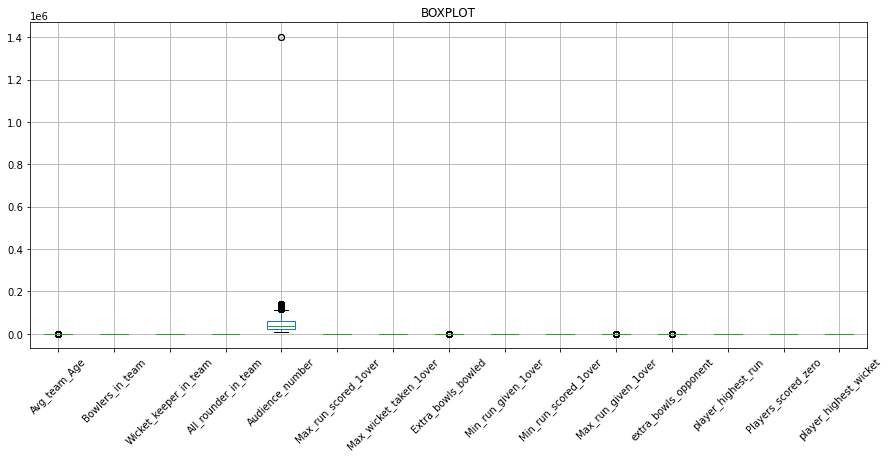

In [16]:
plt.figure(figsize=(15,6))
df_num.boxplot(rot=45)
plt.title('BOXPLOT')

##### Insights:
* It seems that there are outliers in five features;
   * 'Avg_team_Age'
   * 'Audience_number'
   * 'Extra_bowls_bowled'
   * 'Max_run_given_1over'
   * 'extra_bowls_opponent'
* For further insights seperate distribution and boxplots are required.

##### Distribution plots and Boxplots for all numerical variables seperately

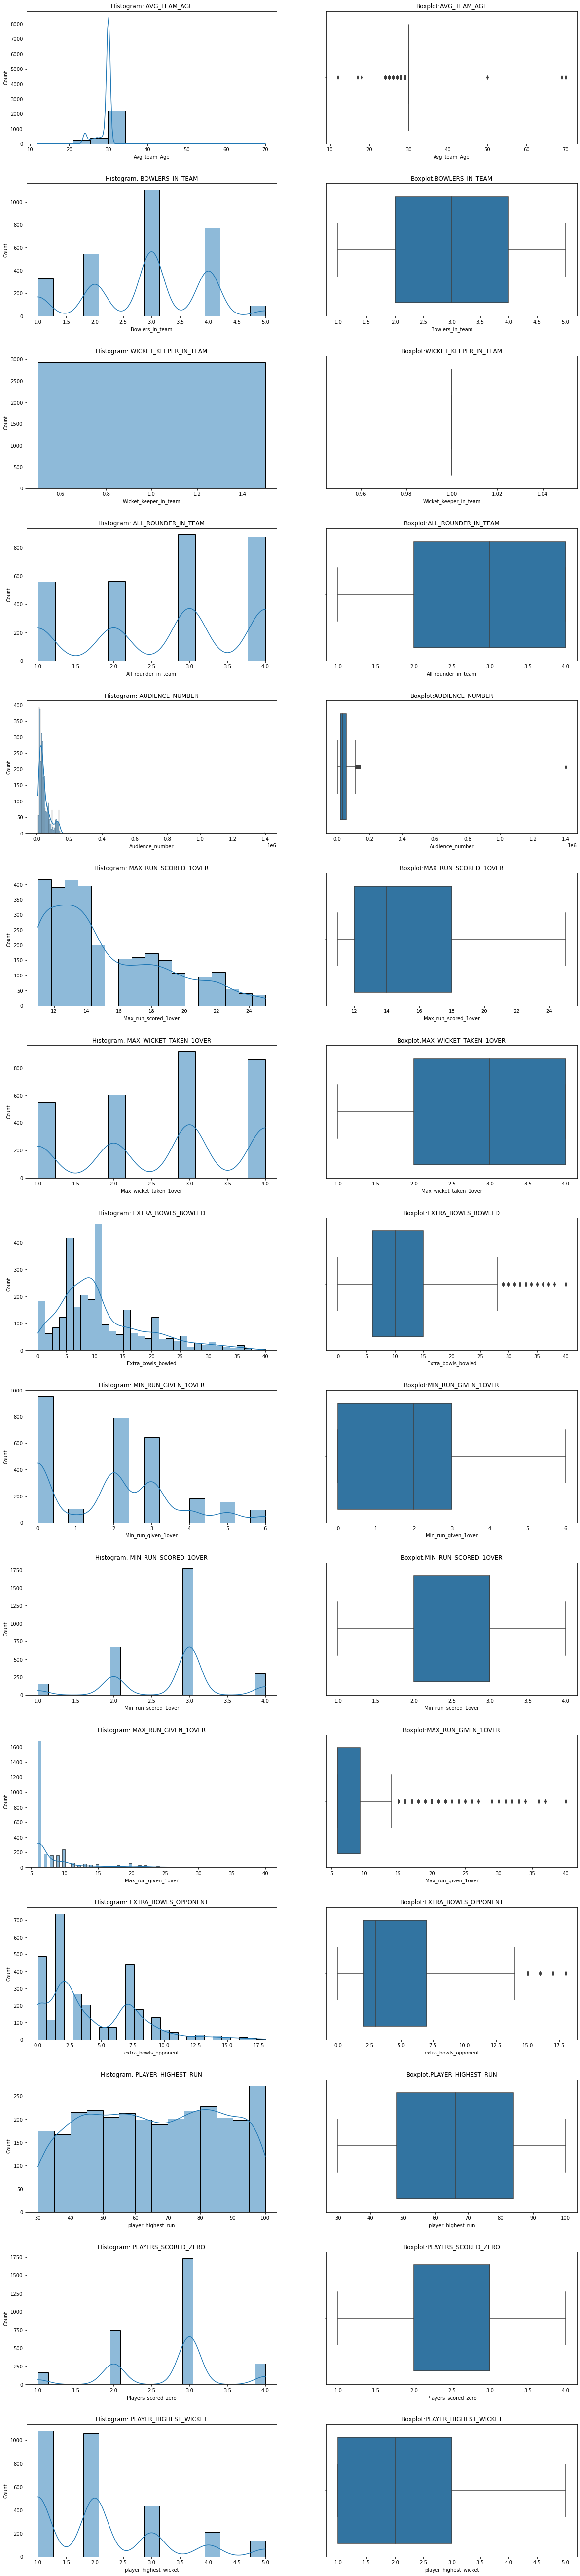

In [20]:
col_list1 = df_num.columns
fig,axes = plt.subplots(15,2,figsize=(20,95))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list1,axes):
    sns.histplot(x=i,data = df_num,ax=j[0],kde=True)
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = df_num,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())
    
    

##### Skewness & Kurtosis check

In [17]:
df_skew=df_num.skew()
df_kurt=df_num.kurtosis()
df2=pd.DataFrame(df_skew,columns=['Skewness'])
df2['Kurtosis']=df_kurt
df2

,Skewness,Kurtosis
Avg_team_Age,5.043676,111.384141
Bowlers_in_team,-0.292318,-0.564224
Wicket_keeper_in_team,0.000000,0.000000
All_rounder_in_team,-0.322969,-1.201037
Audience_number,15.582284,421.363121
Max_run_scored_1over,0.827107,-0.291771
Max_wicket_taken_1over,-0.305597,-1.182057
Extra_bowls_bowled,1.122510,0.934126
Min_run_given_1over,0.433859,-0.523756
Min_run_scored_1over,-0.558124,0.430562


##### Insights:
* Feature wise  observations;
  * 'Avg_team_Age'-- Right skewed and highly peaked.
  * 'Audience_number'-- Right skewed and highly peaked.
  * 'Extra_bowls_bowled'-- Right skewed
  * 'extra_bowls_opponent'-- Right skewed
  * 'player_highest_run'-- Slightly left skewed
  
* The following variables are having less number of unique values and hence countplots will be used to get more insights;
  * 'Avg_team_Age'
  * 'Bowlers_in_team'
  * 'All_rounder_in_team'
  * 'Max_run_scored_1over'
  * 'Max_wicket_taken_1over'
  * 'Min_run_given_1over'
  * 'Min_run_scored_1over'
  * 'Max_run_given_1over'
  * 'player_highest_wicket'
 
* The feature  'Wicket_keeper_in_team' is an unwanted feature, and shall be removed.
  


##### Ploting countplots for variables with low number of unique values

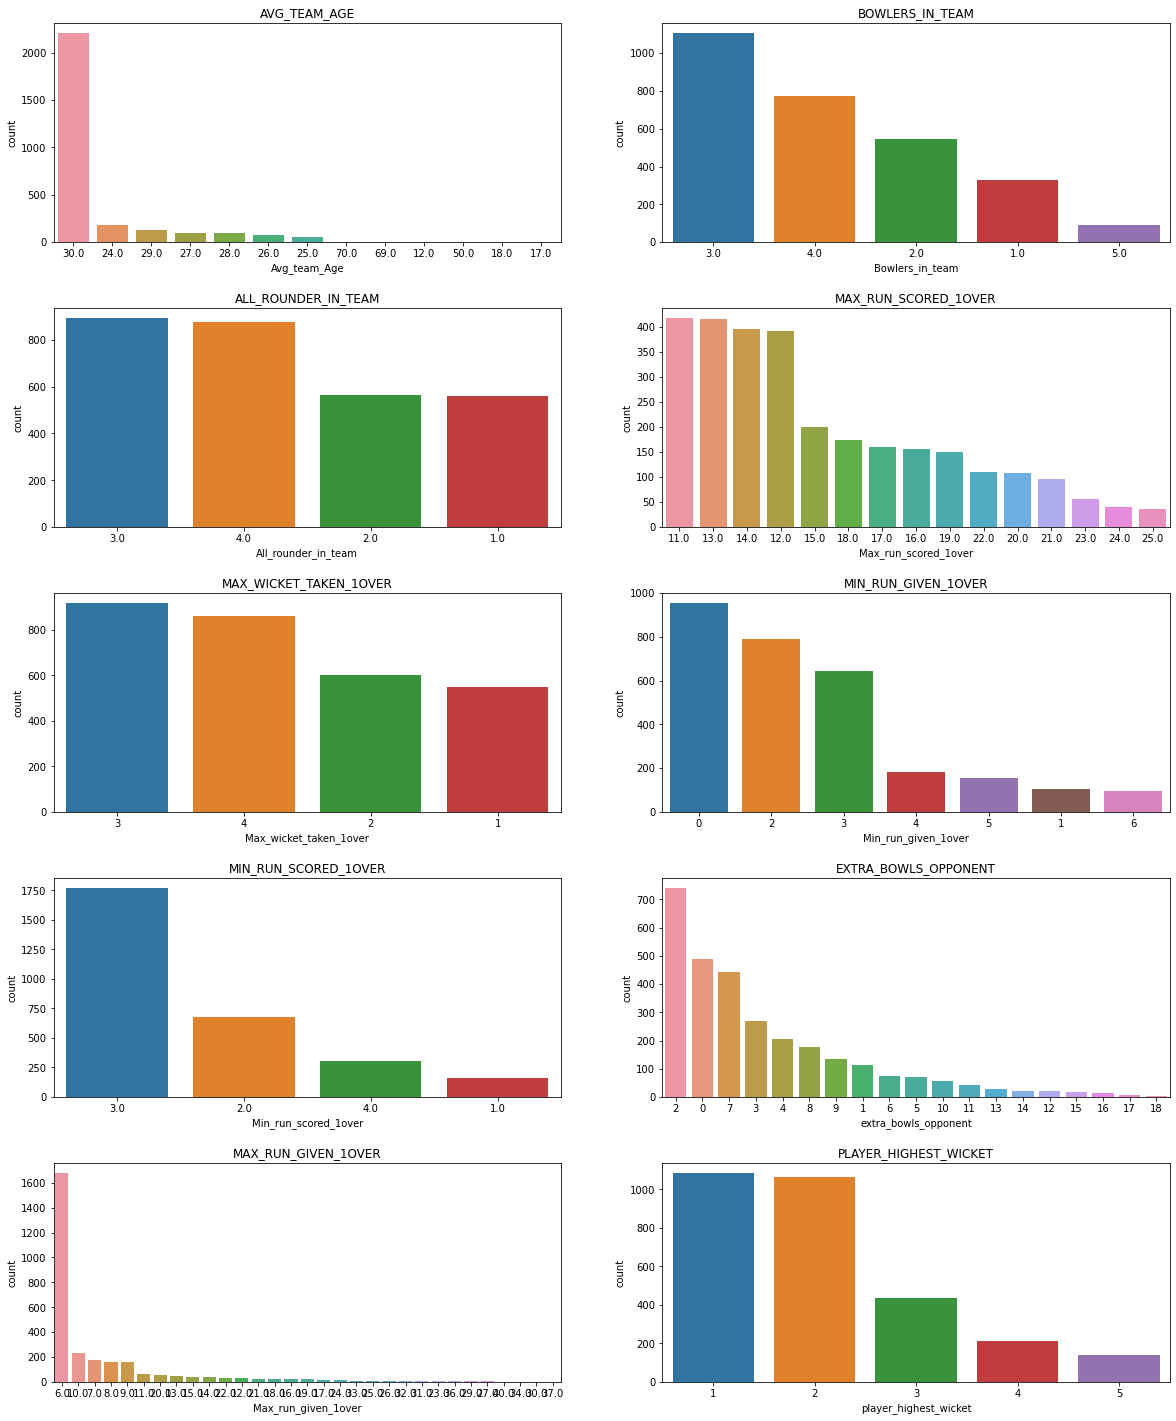

In [22]:
col_list = ['Avg_team_Age','Bowlers_in_team','All_rounder_in_team','Max_run_scored_1over','Max_wicket_taken_1over',
             'Min_run_given_1over','Min_run_scored_1over','extra_bowls_opponent','Max_run_given_1over','player_highest_wicket']
fig,axes = plt.subplots(5,2,figsize=(20,25))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list,axes.flatten()):
    sns.countplot(x=i,data = df_num,ax=j,order = list(df_num[i].value_counts().index))
    j.set_title(i.upper())

##### Insights:
* Feature wise  observations;
  * Avg_team_Age -- In most matches, Indian team was having players aged 30.
  * Bowlers_in_team-- Mostly three bowlers preffered. Team played with 5 bowlers in team, least time. These might be test           matches.
  * All_rounder_in_team -- Mostly three to four all rounders played.
  * Max_run_scored_1over -- 11 to 13 runs scored maximum times.
  * Max_wicket_taken_1over -- Most of the times 3 wickets were taken in an over.
  * Min_run_given_1over -- Zero runs are minimum scored runs in an over most of the times.
  * Min_run_scored_1over -- Minimum 3 runs most of the time
  * extra_bowls_opponent -- Highest count is for 2 balls bowled as extra by the opponent team.
  * Max_run_given_1over -- The highest count is for 6 runs per over
  * player_highest_wicket -- Count for 1 wicket is highest


#### 2.1.1.2 Continuous Attributes

##### Ploting countplots 

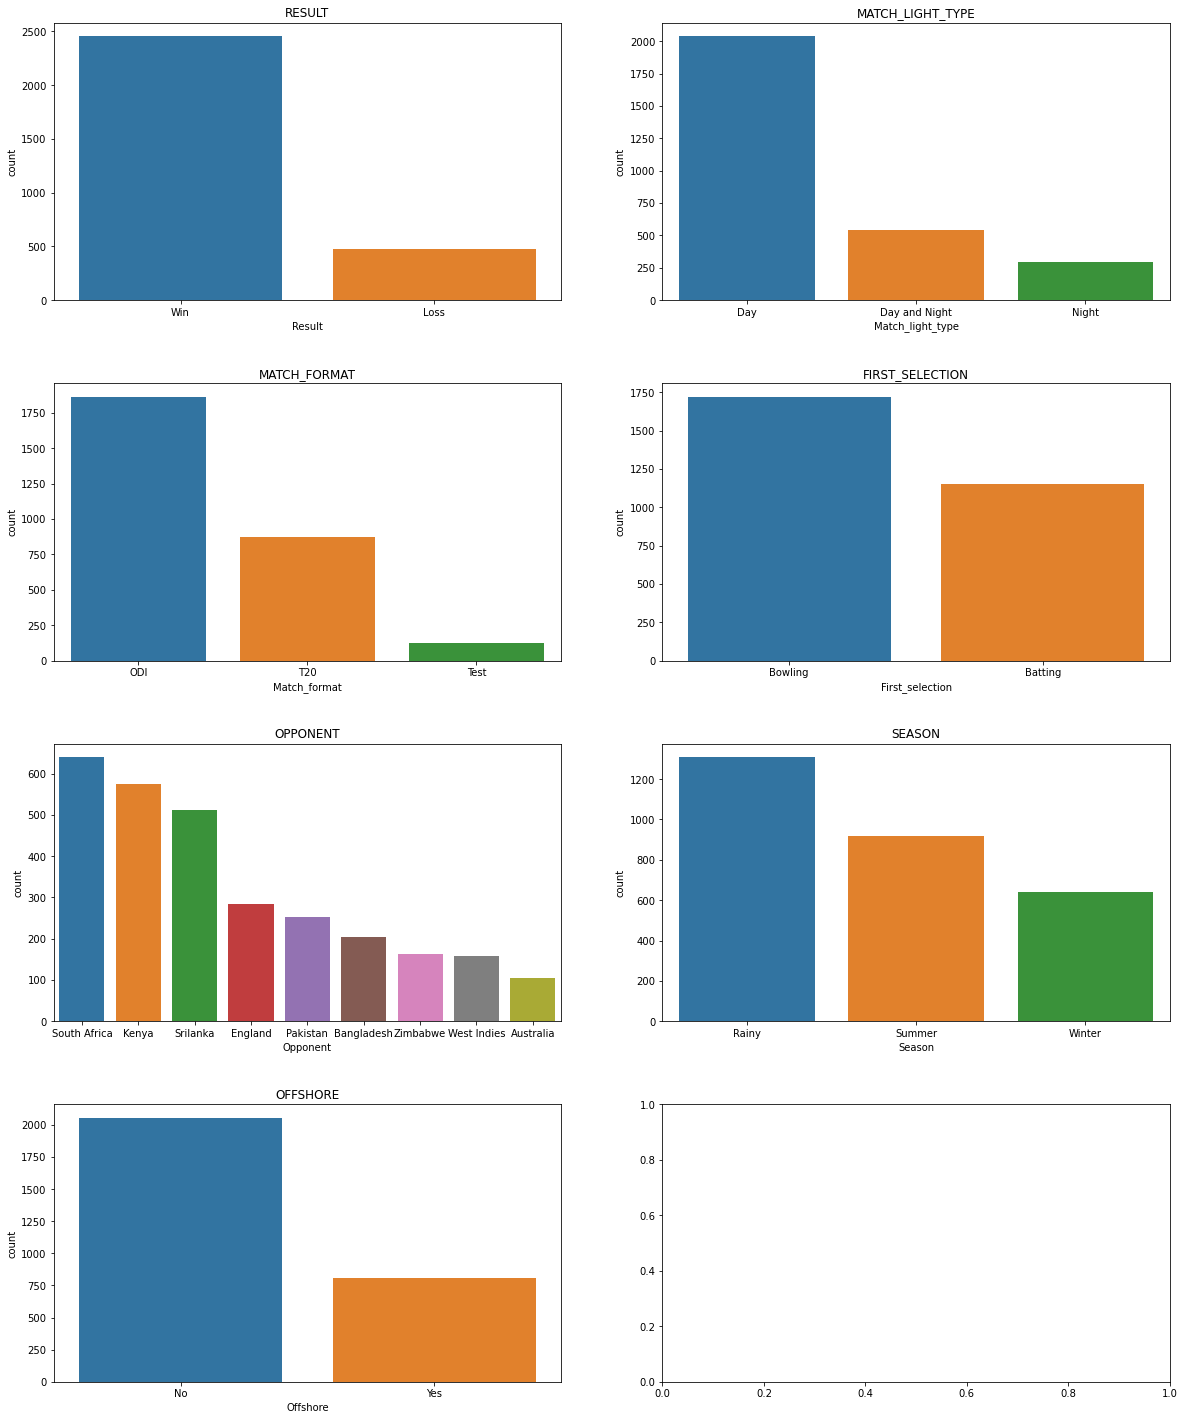

In [23]:
col_list2 = ['Result', 'Match_light_type', 'Match_format','First_selection', 'Opponent', 'Season', 'Offshore']
fig,axes = plt.subplots(4,2,figsize=(20,25))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list2,axes.flatten()):
    sns.countplot(x=i,data = df_cat,ax=j,order = list(df_cat[i].value_counts().index))
    j.set_title(i.upper())

##### Insights:
* Feature wise  observations;
  * Result -- Most of the matches are won by Indian Cricket Team
  * Match_light_type -- Most of the matches played in Day time 
  * Match_format -- One Day International matches are played most of the times
  * First_selection -- Indian team bowled first, most of the times.
  * Opponent -- Most of the matches are played with South Africa and least with Australia
  * Season -- most matches played in Rainy season
  * Offshore -- Most matches played in India only.


### 2.1.2 Bivariate analysis 

#### 'Result' v/s Numerical features ( Countplots and Boxplots)

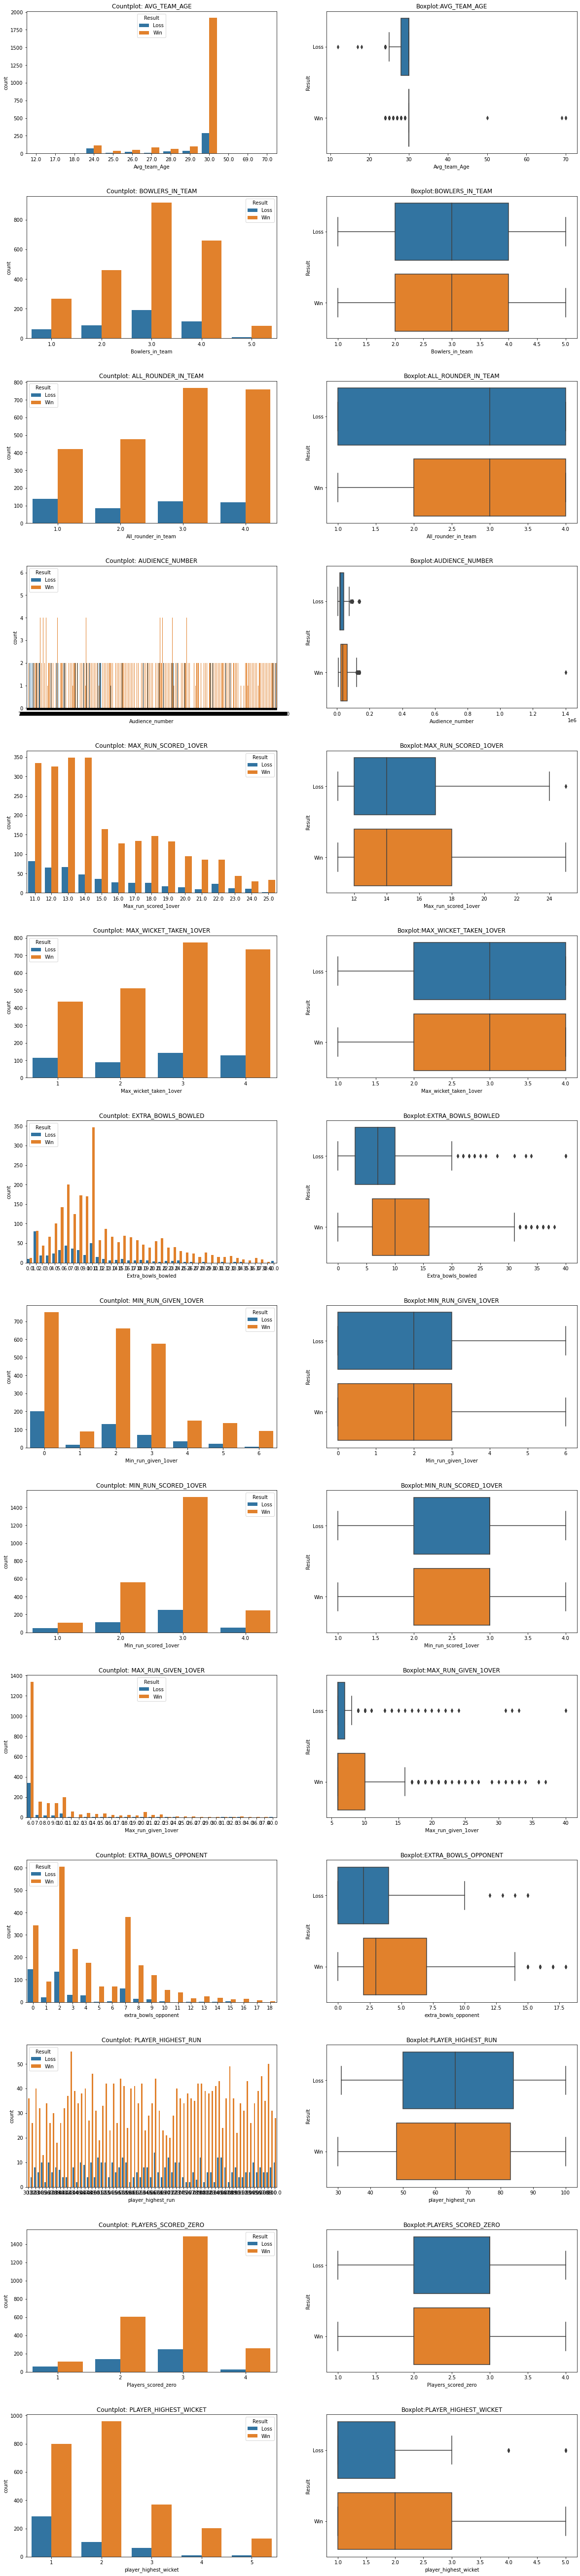

In [24]:
col_list3=['Avg_team_Age', 'Bowlers_in_team','All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over','Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over','Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent','player_highest_run', 'Players_scored_zero', 'player_highest_wicket']
fig,axes = plt.subplots(14,2,figsize=(20,95))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list3,axes):
    sns.countplot(x=i,data = df,ax=j[0],hue='Result')
    j[0].set_title('Countplot: '+i.upper())
    sns.boxplot(x = i,data = df,ax=j[1],y='Result',orient='h')
    j[1].set_title('Boxplot:' +i.upper())

#### 'Result' v/s Numerical features ( Histplots and Boxplots for features not giving clear picture from Countplot )

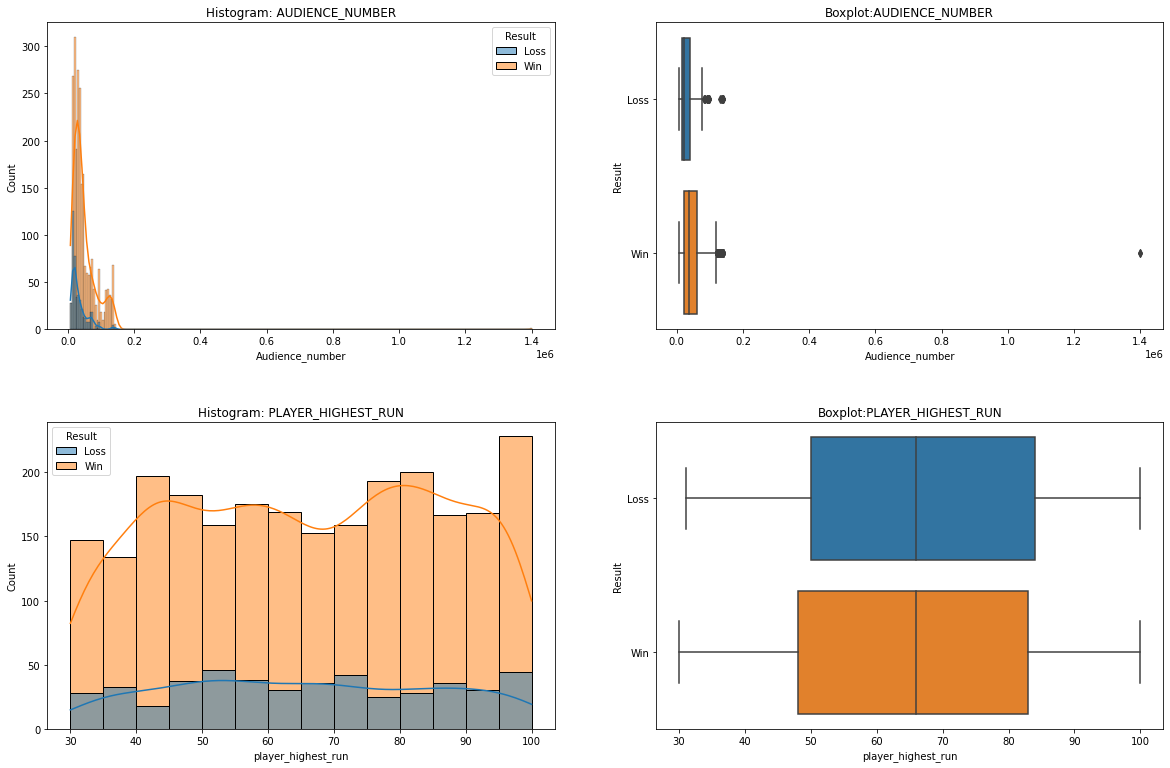

In [25]:
col_list4=['Audience_number', 'player_highest_run']
fig,axes = plt.subplots(2,2,figsize=(20,13))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list4,axes):
    sns.histplot(x=i,data = df,ax=j[0],kde=True,hue='Result')
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = df,ax=j[1],y='Result',orient='h')
    j[1].set_title('Boxplot:' +i.upper())

##### Insights:
* Feature wise  observations of result v/s;
  * Avg_team_Age -- It seems that India lost the matches where the average age of team was less than 30. 
  * Bowlers_in_team -- Shows no visible effect on result.
  * All_rounder_in_team -- It seems that Indian team mostly lost while having less than three all rounders in it.
  * Audience_number -- It seems that Indian Team won mostly when the audience was larger
  * Max_run_scored_1over -- Higher maximum runs scored in an over are reflecting in more wins.
  * Max_wicket_taken_1over -- Shows no visible effect on result
  * Extra_bowls_bowled -- More extra bowls bowled in the matches that are won. This looks like an opposite observation.
  * Min_run_given_1over -- Shows no visible effect on result.
  * Min_run_scored_1over -- Shows no visible effect on result.
  * Max_run_given_1over -- It seems that while the maximum rumns given in an over are high in the matches, India won. This         looks like an opposite observation.
  * extra_bowls_opponent -- Indian team won most of the matches having higher extra bowls bowled by opponent.
  * player_highest_run -- Shows no visible effect on result.
  * Players_scored_zero -- Shows no visible effect on result.
  * player_highest_wicket -- It seems there is a significant effect on the match result of a player taking more wickets in the     match. If this variable is high, Indian team won the match.

#### Checking above insights with reference to 'Mean ' of each variable.

##### All_rounder_in_team

In [26]:
df_effect=df[(df['All_rounder_in_team']<df.All_rounder_in_team.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['All_rounder_in_team']>df.All_rounder_in_team.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     80.107047
Loss    19.892953
Name: Result, dtype: float64 

Win     86.319955
Loss    13.680045
Name: Result, dtype: float64


##### Audience_number

In [27]:
df_effect=df[(df['Audience_number']<df.Audience_number.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['Audience_number']>df.Audience_number.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     81.421899
Loss    18.578101
Name: Result, dtype: float64 

Win     89.370933
Loss    10.629067
Name: Result, dtype: float64


##### Extra_bowls_bowled

In [28]:
df_effect=df[(df['Extra_bowls_bowled']<df.Extra_bowls_bowled.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['Extra_bowls_bowled']>df.Extra_bowls_bowled.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     80.073801
Loss    19.926199
Name: Result, dtype: float64 

Win     90.737052
Loss     9.262948
Name: Result, dtype: float64


##### Max_run_given_1over

In [29]:
df_effect=df[(df['Max_run_given_1over']<df.Max_run_given_1over.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['Max_run_given_1over']>df.Max_run_given_1over.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     81.181728
Loss    18.818272
Name: Result, dtype: float64 

Win     89.569161
Loss    10.430839
Name: Result, dtype: float64


##### extra_bowls_opponent

In [30]:
df_effect=df[(df['extra_bowls_opponent']<df.extra_bowls_opponent.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['extra_bowls_opponent']>df.extra_bowls_opponent.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     79.911943
Loss    20.088057
Name: Result, dtype: float64 

Win     90.296496
Loss     9.703504
Name: Result, dtype: float64


##### player_highest_run

In [32]:
df_effect=df[(df['player_highest_run']<df.player_highest_run.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['player_highest_run']>df.player_highest_run.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     83.647799
Loss    16.352201
Name: Result, dtype: float64 

Win     83.888511
Loss    16.111489
Name: Result, dtype: float64


##### player_highest_wicket

In [33]:
df_effect=df[(df['player_highest_wicket']<df.player_highest_wicket.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100,'\n')

df_effect=df[(df['player_highest_wicket']>df.player_highest_wicket.mean())& (df['Result'])]
print(df_effect['Result'].value_counts(normalize=True)*100)

Win     81.835119
Loss    18.164881
Name: Result, dtype: float64 

Win     89.399745
Loss    10.600255
Name: Result, dtype: float64


#### 'Result' v/s other Categorical features

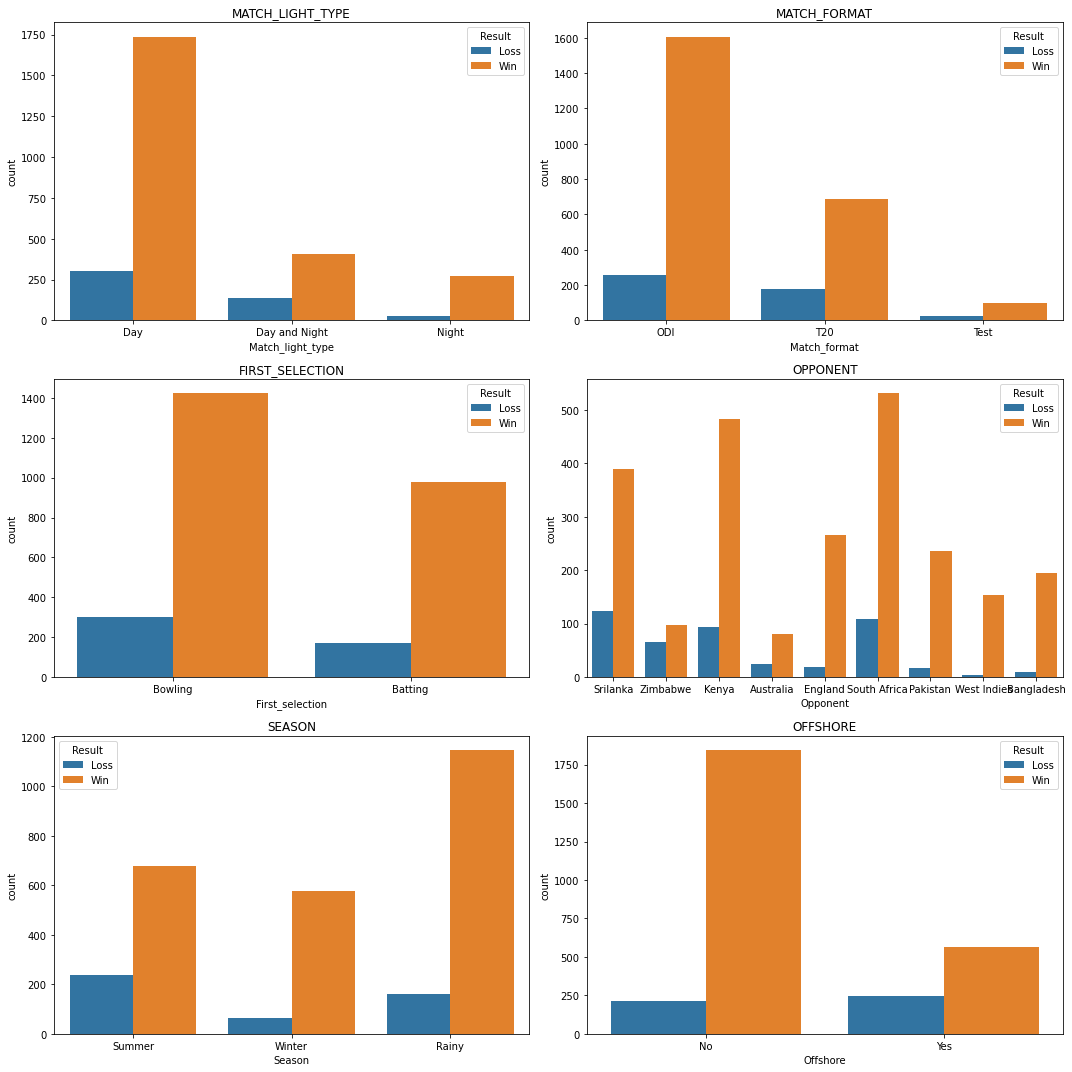

In [34]:
col_list5=df[['Match_light_type', 'Match_format','First_selection', 'Opponent', 'Season', 'Offshore']]
fig=plt.figure(figsize=(15,15))

for i in range(0,len(col_list5.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.countplot(col_list5[col_list5.columns[i]],hue=df.Result)
    plt.title(col_list5.columns[i].upper())
    plt.tight_layout()
   

##### Insights:
* Feature wise  observations of result v/s;
  * Match_light_type -- It seems that winning percentage is more for India in the matches played in day time.
  * Match_format -- Winning percentage is more in ODIs for India
  * First_selection -- No obsevable difference
  * Opponent -- It seems that winning percentage is highest against West Indies and lowest against Zimbabwe. Required to be         checked numerically. 
  * Season -- Most wins are recorded in Rainy season
  * Offshore -- Winning percentage is higher while matches were played in India


#### Checking above insights with reference to 'Mode ' of each variable.

##### Match_light_type

In [275]:
print(df.Match_light_type.mode()[0],'\n')
df_Cat_effect=df[(df['Match_light_type']==df.Match_light_type.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['Match_light_type']!=df.Match_light_type.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

Day 

Win     85.154336
Loss    14.845664
Name: Result, dtype: float64 

Win     80.87739
Loss    19.12261
Name: Result, dtype: float64 



##### Match_format

In [276]:
print(df.Match_format.mode()[0],'\n')
df_Cat_effect=df[(df['Match_format']==df.Match_format.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['Match_format']!=df.Match_format.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

ODI 

Win     86.16622
Loss    13.83378
Name: Result, dtype: float64 

Win     79.812207
Loss    20.187793
Name: Result, dtype: float64 



##### First_selection

In [277]:
print( df.First_selection.mode()[0],'\n')
df_Cat_effect=df[(df['First_selection']==df.First_selection.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['First_selection']!=df.First_selection.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

Bowling 

Win     82.636469
Loss    17.363531
Name: Result, dtype: float64 

Win     85.596026
Loss    14.403974
Name: Result, dtype: float64 



##### Opponent

In [278]:
print(df.Opponent.mode()[0],'\n')
df_Cat_effect=df[(df['Opponent']==df.Opponent.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['Opponent']!=df.Opponent.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

South Africa 

Win     82.96875
Loss    17.03125
Name: Result, dtype: float64 

Win     84.104803
Loss    15.895197
Name: Result, dtype: float64 



##### Season

In [279]:
print(df.Season.mode()[0],'\n')
df_Cat_effect=df[(df['Season']==df.Season.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['Season']!=df.Season.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

Rainy 

Win     87.624141
Loss    12.375859
Name: Result, dtype: float64 

Win     80.814312
Loss    19.185688
Name: Result, dtype: float64 



##### Offshore

In [280]:
print( df.Offshore.mode()[0],'\n')
df_Cat_effect=df[(df['Offshore']==df.Offshore.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

df_Cat_effect=df[(df['Offshore']!=df.Offshore.mode()[0])& (df['Result'])]
print(df_Cat_effect['Result'].value_counts(normalize=True)*100,'\n')

No 

Win     89.693729
Loss    10.306271
Name: Result, dtype: float64 

Win     70.103093
Loss    29.896907
Name: Result, dtype: float64 



#### Crosstabs of 'Result' v/s other categorical features

In [288]:
col_list5=df[['Match_light_type', 'Match_format','First_selection', 'Opponent', 'Season', 'Offshore']]

for i in col_list5.columns:
    print(pd.crosstab(index=df['Result'],columns= col_list5[i],margins=True, normalize=True).round(2),'\n\n')

Match_light_type   Day  Day and Night  Night   All
Result                                            
Loss              0.11           0.05   0.01  0.16
Win               0.60           0.14   0.09  0.84
All               0.71           0.19   0.10  1.00 


Match_format   ODI   T20  Test   All
Result                              
Loss          0.09  0.06  0.01  0.16
Win           0.56  0.24  0.04  0.84
All           0.65  0.30  0.04  1.00 


First_selection  Batting  Bowling   All
Result                                 
Loss                0.06      0.1  0.16
Win                 0.34      0.5  0.84
All                 0.40      0.6  1.00 


Opponent  Australia  Bangladesh  England  Kenya  Pakistan  South Africa  \
Result                                                                    
Loss           0.01        0.00     0.01   0.03      0.01          0.04   
Win            0.03        0.07     0.09   0.17      0.08          0.18   
All            0.04        0.07     0.10   0.20    

### 2.1.3 Multivariate analysis 

#### Checking the relation between different numeric variables

##### Pairplot

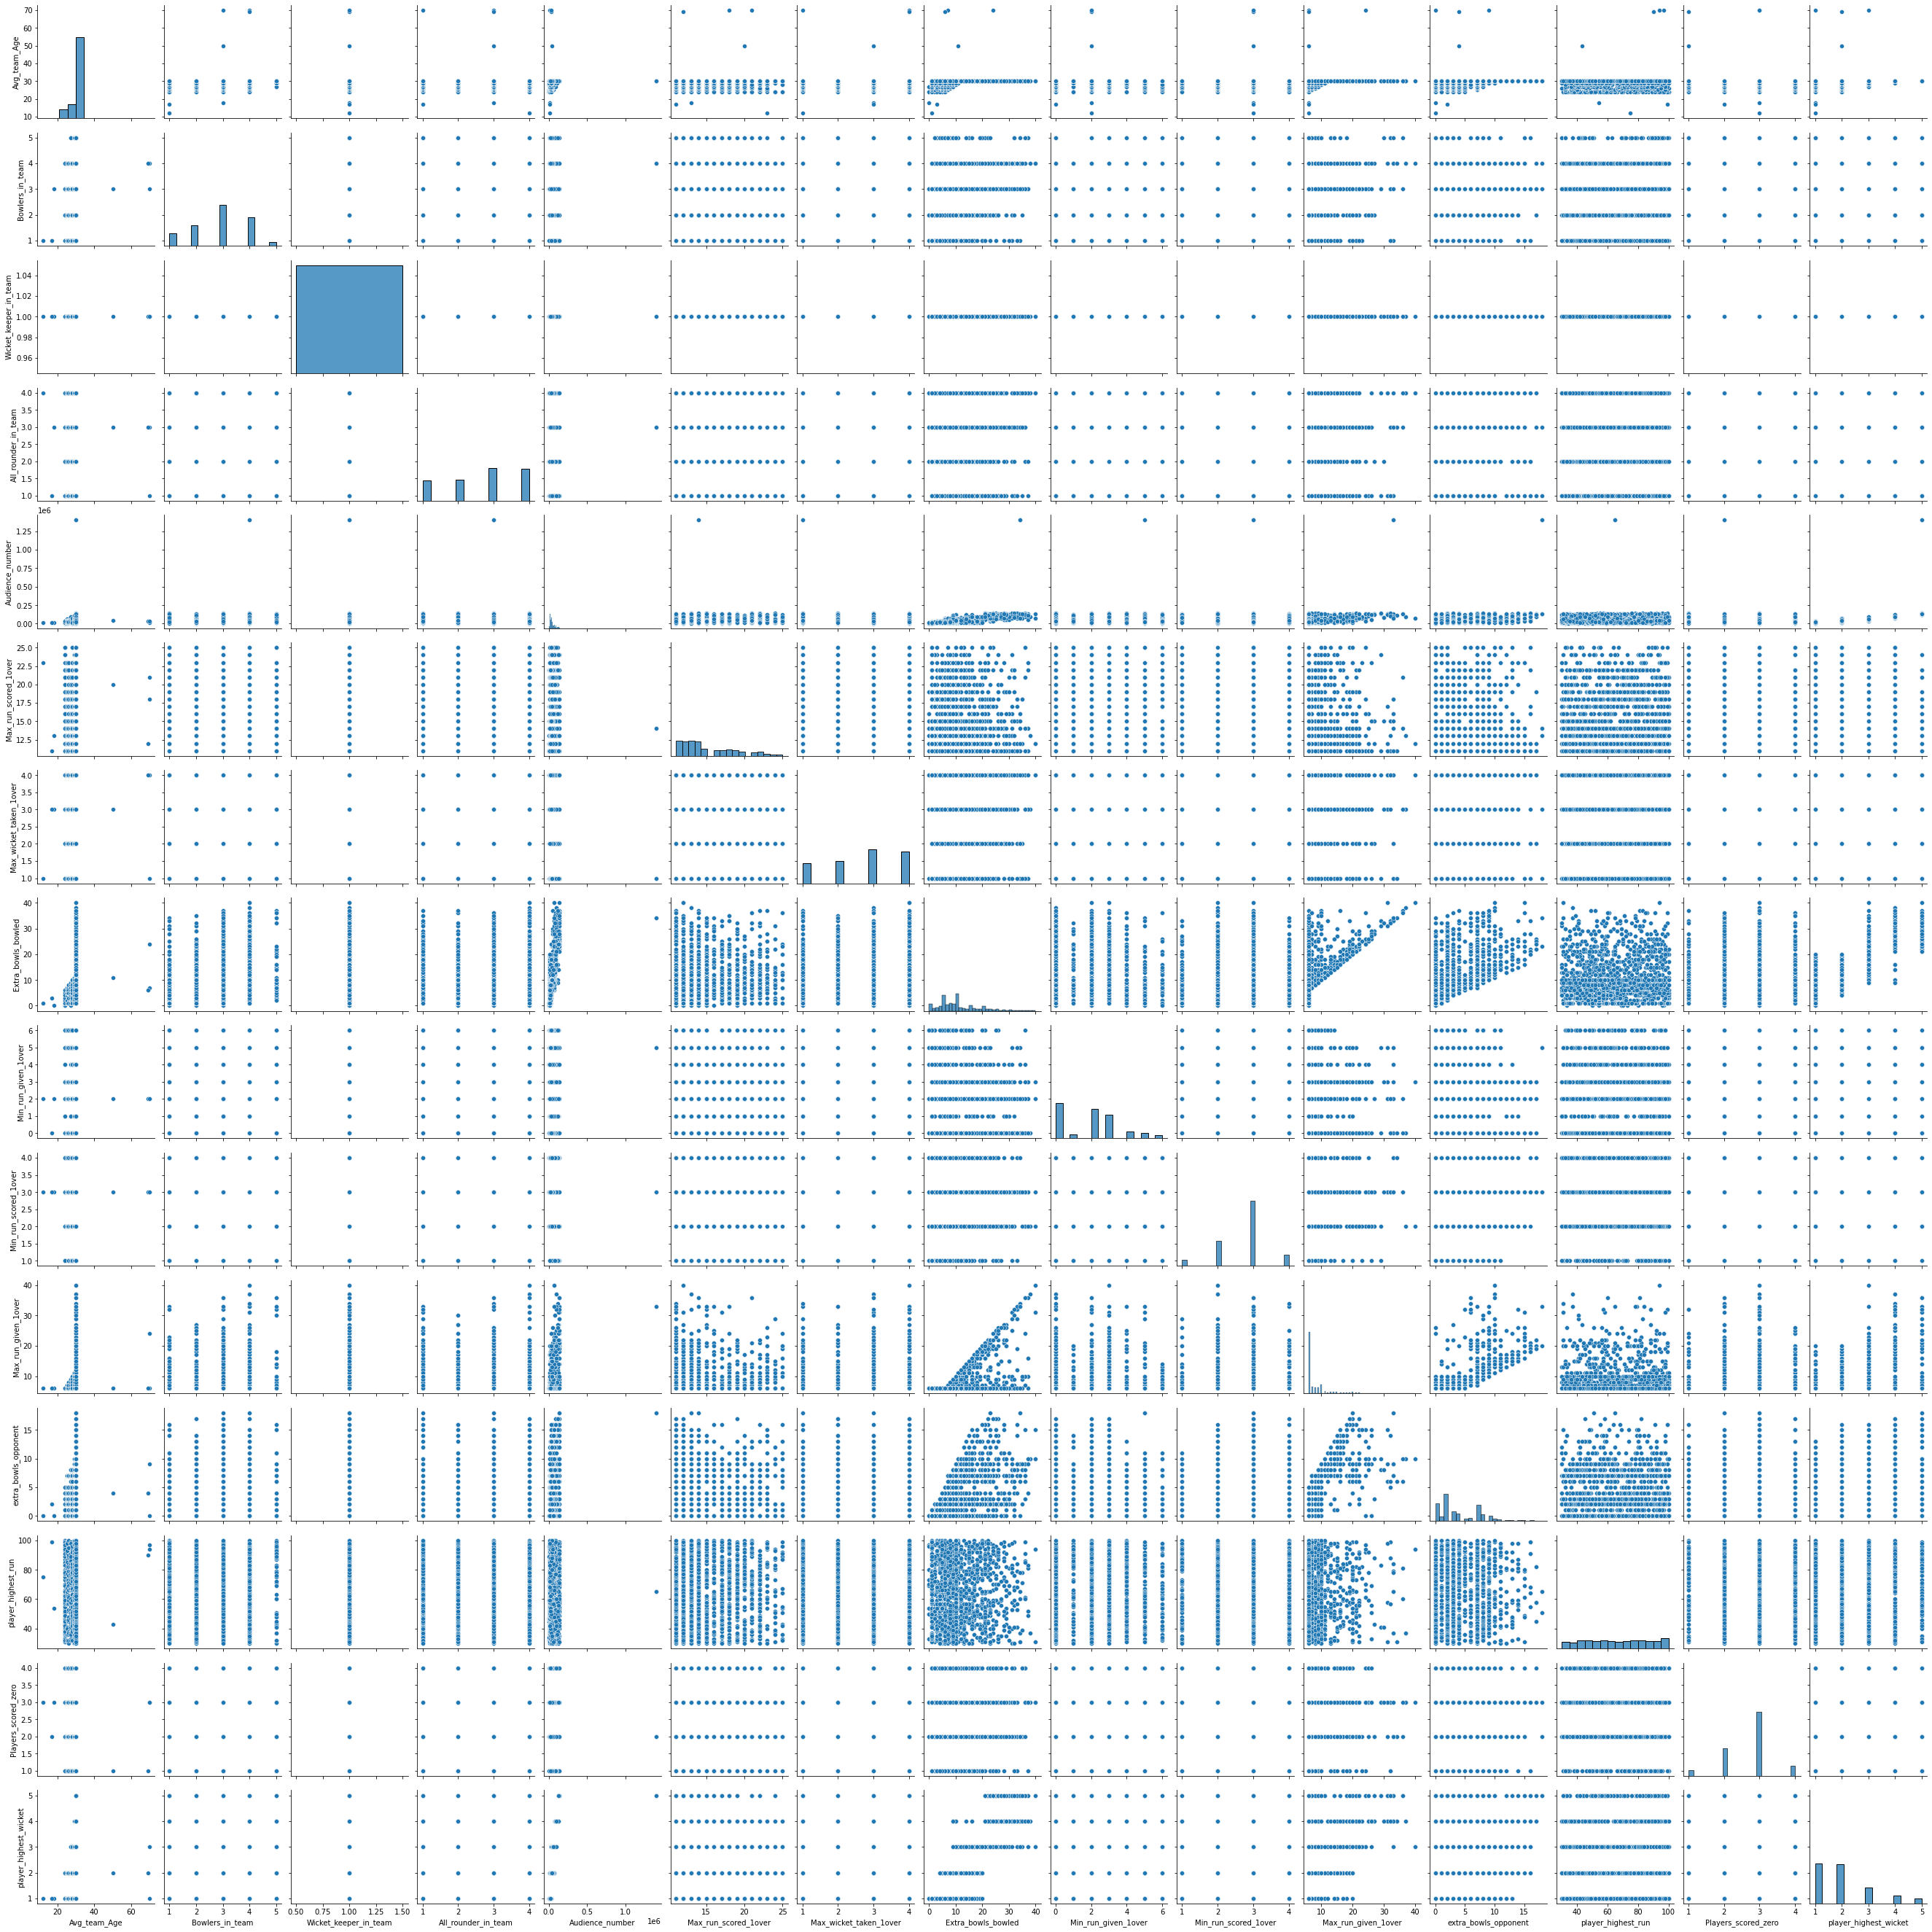

In [42]:
sns.pairplot(df)

#### Insights from pairplot:
* There seems to be correlation between following pairs of features;
  * Extra_bowls_bowled and Max_run_given_1over
  * Extra_bowls_bowled and extra_bowls_opponent
  * Max_run_given_1over and extra_bowls_opponent


#### Checking above insights using scatterplot

##### Extra_bowls_bowled' v/s 'Max_run_given_1over'

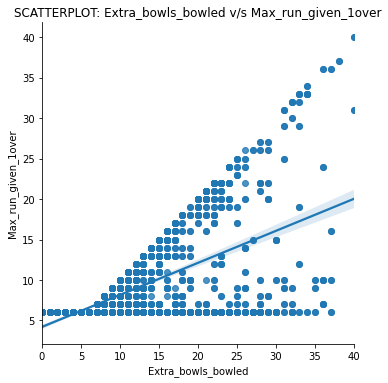

In [300]:
sns.lmplot(data=df,x='Extra_bowls_bowled',y='Max_run_given_1over');
plt.title('SCATTERPLOT: Extra_bowls_bowled v/s Max_run_given_1over');

##### 'Extra_bowls_bowled' v/s 'extra_bowls_opponent' 

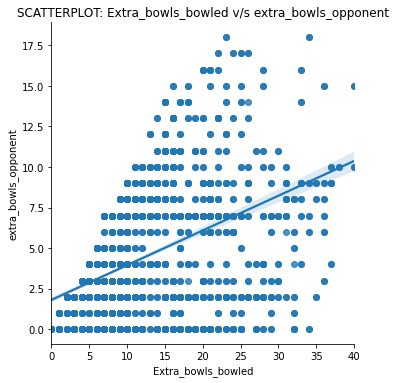

In [301]:
sns.lmplot(data=df,x='Extra_bowls_bowled',y='extra_bowls_opponent')
plt.title('SCATTERPLOT: Extra_bowls_bowled v/s extra_bowls_opponent');

##### 'Extra_bowls_bowled' v/s 'extra_bowls_opponent'

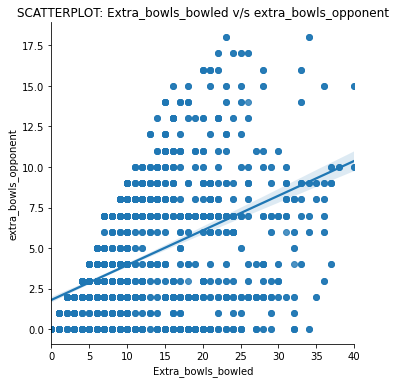

In [302]:
sns.lmplot(data=df,x='Extra_bowls_bowled',y='extra_bowls_opponent')
plt.title('SCATTERPLOT: Extra_bowls_bowled v/s extra_bowls_opponent');

* There seems to be some correlation between these features
* We will get more information from Heatmap

##### Heatmap

<AxesSubplot:>

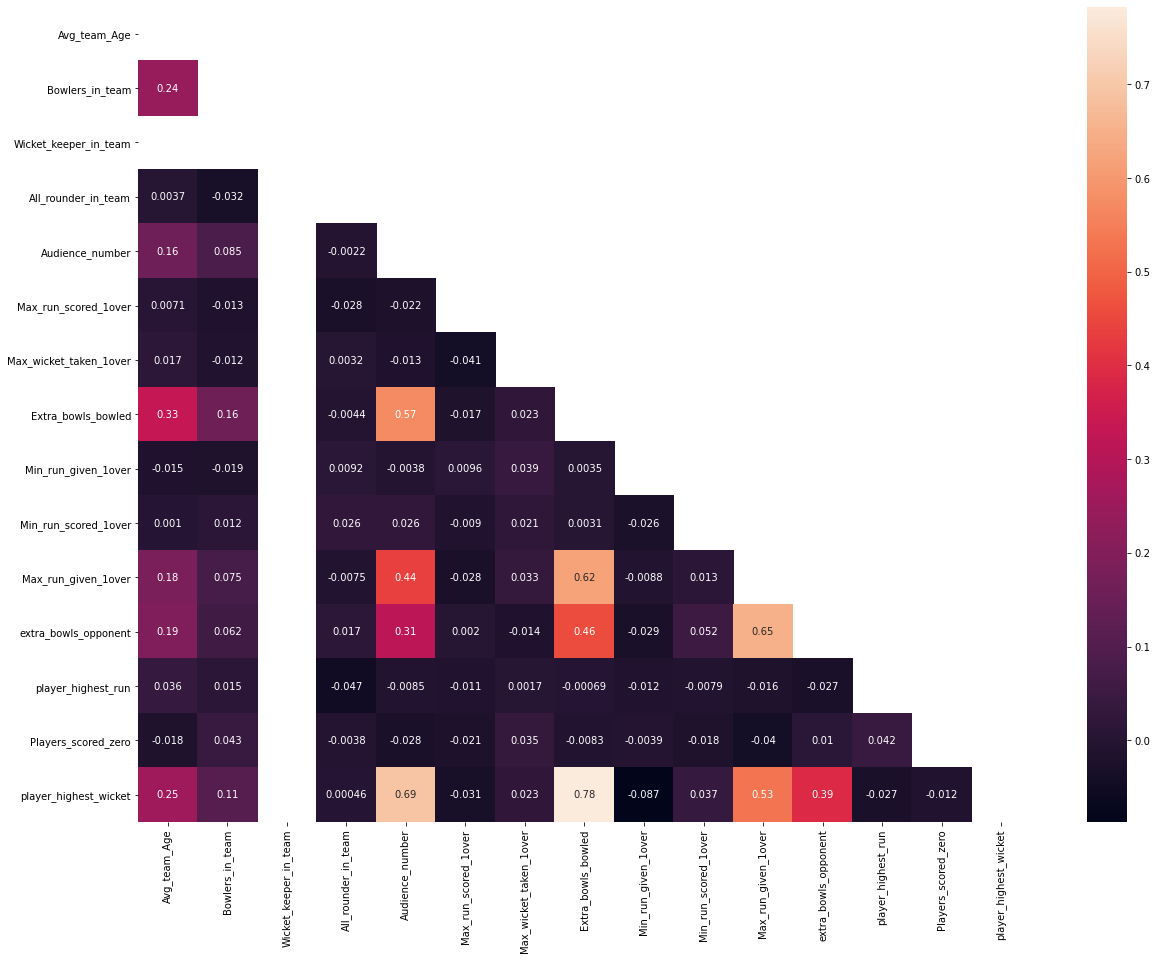

In [46]:
plt.figure(figsize=(20,15))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=np.bool))
sns.heatmap(df_num.corr(),annot=True, mask=mask)

#### Insights:
* There seems to be slight correlation between following pairs of features;
  * player_highest_wicket and Extra_bowls_bowled
  * player_highest_wicket and Audience_number

#### Checking relation between above insights alongwith 'Result'

##### 'player_highest_wicket' v/s 'Extra_bowls_bowled'

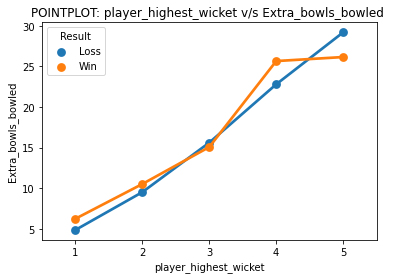

In [294]:
sns.pointplot(data=df,x='player_highest_wicket',y='Extra_bowls_bowled',hue='Result', ci= False)
plt.title('POINTPLOT: player_highest_wicket v/s Extra_bowls_bowled ');

##### 'player_highest_wicket' v/s 'Audience_number'

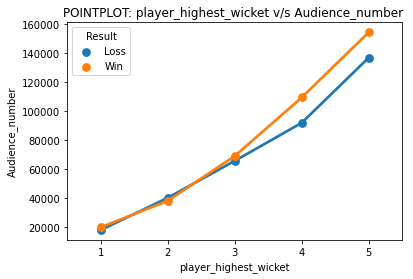

In [295]:
sns.pointplot(data=df,x='player_highest_wicket',y='Audience_number',hue='Result', ci= False)
plt.title('POINTPLOT: player_highest_wicket v/s Audience_number ');

### Insights;
* Wickets taken by individual player increses with the extra bowls bolwed in match by Indian Team.
* Indian team lost the macthes where extra bowls bowled are above 25 but the wickets taken by individual player is above 4.5(on   an average)
* With  audience number the number of wickets taken by individual increases and the increase in these both features incresed     the wining of Indian Team.

# 3. Data Cleaning and Pre-processing


## 3.1 Removal of unwanted variables

* As checked in above analysis, there are two unwanted variables in the data;
  * Game_number - Unique ID presenting serial  numbers of games.
  * Wicket_keeper_in_team -- Team always played with one wicketkeeper so this feature has mean 1 and std dev 0 due to all           entries as 1. This will not provide any input in predictions.
* Hence, dropping above two features.

In [18]:
df_copy=df.copy()

In [19]:
df_1=df_copy.drop(['Game_number','Wicket_keeper_in_team'],axis=1)


* After dropping two features now we are having 21 columns.

In [20]:
df_1=df_1.copy()

## 3.2.1 Missing Value treatment 

#### Checking percentage of null values in data with respect to 'Result'

In [24]:
print('Total null values in dataset are:',df_1.isnull().sum().sum())

Total null values in dataset are: 789


In [27]:
print('Percentage of missing data is:',round((df_1.isnull().sum().sum()*100)/(df_1.size),2),"%")

Percentage of missing data is: 1.28 %


* Total null values are 789 
* Missing data is 1.28% of total values in data

In [32]:
# DataFrame of rows having any null value
df_null=df_1[df_1.isnull().sum(axis=1)>0]
df_null

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2,Loss,24.0,Day and Night,T20,3.0,2.0,Bowling,Zimbabwe,NaN,13146.0,Yes,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Win,24.0,NaN,ODI,2.0,2.0,Bowling,Kenya,Summer,7357.0,No,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
25,Loss,NaN,Day,T20,1.0,4.0,Bowling,Zimbabwe,Summer,11725.0,Yes,19.0,4,0.0,0,2.0,6.0,0,50.0,3,1
27,Loss,24.0,NaN,T20,1.0,3.0,Batting,Zimbabwe,Summer,16275.0,No,21.0,1,1.0,0,4.0,6.0,0,100.0,1,1
32,Loss,24.0,Night,ODI,3.0,1.0,Batting,Kenya,Summer,NaN,Yes,25.0,2,1.0,2,4.0,6.0,1,96.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Win,NaN,Day,Test,4.0,3.0,Bowling,Bangladesh,Rainy,137452.0,Yes,18.0,1,35.0,0,3.0,10.0,9,71.0,4,5
2883,Win,30.0,NaN,T20,4.0,2.0,Bowling,South Africa,Summer,93387.0,No,12.0,1,21.0,0,3.0,20.0,8,77.0,3,4
2886,Win,30.0,Day,ODI,3.0,3.0,NaN,England,Summer,31080.0,Yes,19.0,4,9.0,3,3.0,6.0,2,77.0,3,2
2905,Win,30.0,Day,ODI,NaN,2.0,Batting,West Indies,Rainy,92442.0,No,12.0,1,20.0,3,3.0,18.0,16,99.0,1,3


In [30]:
print('Percentage of "Loss" class in target variable is',
      round(df_1.Result.value_counts()[1]*100/df_1.Result.count(),2),"%")

Percentage of "Loss" class in target variable is 16.14 %


In [34]:
print('Percentage of "Loss" class in target variable while dropping null values',
      round(df_null.Result.value_counts()[1]*100/df_1.Result.count(),2),"%")

Percentage of "Loss" class in target variable while dropping null values 3.62 %


* If we choose to drop the missing values than we will further loose 3.62% of data having Result as Loss. This will make the data even more unbalanced as the data is already unbalanced with just 16% of values as 'Loss' in 'Result' feature. 

#### Checking  column-wise percentage of null values in data 

In [35]:
df_1.isnull().sum().sort_values(ascending=False)/df_1.index.size

Avg_team_Age              0.033106
Bowlers_in_team           0.027986
Audience_number           0.027645
Match_format              0.023891
Offshore                  0.021843
Season                    0.021160
First_selection           0.020137
Match_light_type          0.017747
All_rounder_in_team       0.013652
Opponent                  0.012287
Max_run_given_1over       0.011604
Extra_bowls_bowled        0.009898
Max_run_scored_1over      0.009556
player_highest_run        0.009556
Min_run_scored_1over      0.009215
extra_bowls_opponent      0.000000
Players_scored_zero       0.000000
Result                    0.000000
Min_run_given_1over       0.000000
Max_wicket_taken_1over    0.000000
player_highest_wicket     0.000000
dtype: float64

* There is no column with very high percentage of null values in it.

####  Checking  null values in data , row-wise

In [36]:
df_1.isnull().sum(axis=1).sort_values(ascending=False).head()

1712    2
481     2
121     2
1422    2
647     2
dtype: int64

* Null values are distributed row-wise. There isnt a row having lot of null values.

#### So, imputing the null values using simple imputer, using 'Median' for numerical features and 'Mode' for categorical .

In [37]:
df_cat1= df_1.select_dtypes(['object'])
df_num1= df_1.select_dtypes(['int64','float64','int'])

In [38]:
from sklearn.impute import SimpleImputer
imputer1= SimpleImputer(missing_values= np.nan, strategy='median')
imputer2= SimpleImputer(missing_values= np.nan, strategy='most_frequent')

In [39]:
imr1 = imputer1.fit(df_num1)
imr2 = imputer2.fit(df_cat1)

In [40]:
df_num1 = pd.DataFrame(imr1.transform(df_num1), columns=df_num1.columns)
df_cat1 = pd.DataFrame(imr2.transform(df_cat1), columns=df_cat1.columns)

In [41]:
df_2 = pd.concat([df_num1, df_cat1], axis=1, join='inner')

In [299]:
print('Total null values present now: ',df_2.isnull().sum().sum())

Total null values present now:  0


* Total null values present now:  0
* Null values imputed successfully.

In [44]:
df_3=df_2.copy()

## 3.2.2 Outlier treatment 

#### The features identified having outliers during univariate analysis are;
   * 'Avg_team_Age'
   * 'Audience_number'
   * 'Extra_bowls_bowled'
   * 'Max_run_given_1over'
   * 'extra_bowls_opponent'
* Getting histograms and box plots for these features again

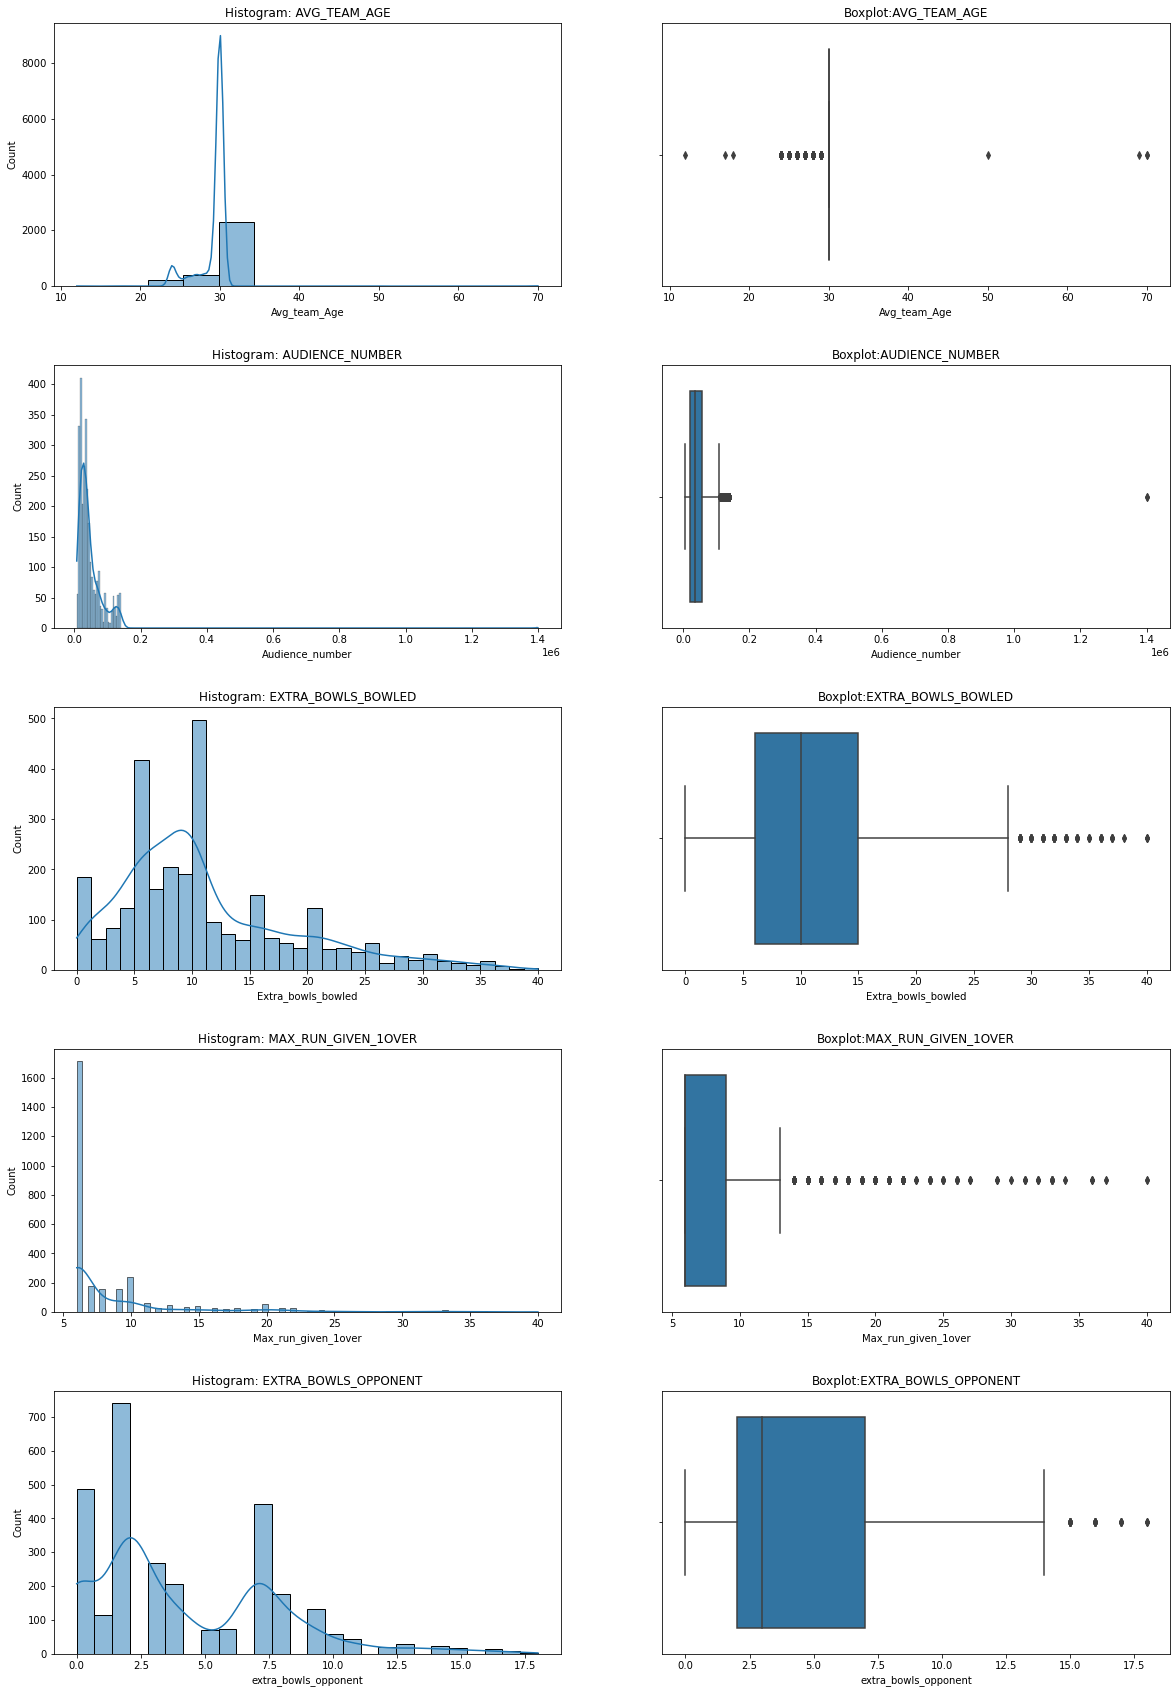

In [67]:
col_list5 = df_3[['Avg_team_Age','Audience_number','Extra_bowls_bowled','Max_run_given_1over','extra_bowls_opponent']]
fig,axes = plt.subplots(5,2,figsize=(20,30))
plt.subplots_adjust(hspace=0.3,wspace=0.2)
for i,j in zip(col_list5,axes):
    sns.histplot(x=i,data = df_3,ax=j[0],kde=True)
    j[0].set_title('Histogram: '+i.upper())
    sns.boxplot(x = i,data = df_3,ax=j[1],orient='h')
    j[1].set_title('Boxplot:' +i.upper())

#### Checking each of the five variables seperately and treating outliers if required.

##### Avg_team_Age

In [68]:
df_3.Avg_team_Age.describe()

count    2930.000000
mean       29.267918
std         2.230540
min        12.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: Avg_team_Age, dtype: float64

##### Getting  values below 1st quartile

In [69]:
df_3[df_3.Avg_team_Age<30].shape

(626, 21)

In [70]:
df_3[df_3.Avg_team_Age<30].sort_values(by='Avg_team_Age').head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
112,12.0,1.0,4.0,17304.0,23.0,1.0,1.0,2.0,3.0,6.0,0.0,75.0,3.0,1.0,Loss,Day,ODI,Bowling,Kenya,Summer,Yes
58,17.0,1.0,1.0,15218.0,11.0,3.0,3.0,0.0,3.0,6.0,2.0,99.0,2.0,1.0,Loss,Day and Night,T20,Batting,Zimbabwe,Summer,Yes
0,18.0,3.0,3.0,9940.0,13.0,3.0,0.0,2.0,3.0,6.0,0.0,54.0,3.0,1.0,Loss,Day,ODI,Bowling,Srilanka,Summer,No
125,24.0,1.0,3.0,23065.0,13.0,3.0,3.0,3.0,1.0,6.0,2.0,51.0,3.0,1.0,Win,Day,ODI,Batting,Srilanka,Summer,No
126,24.0,2.0,4.0,18529.0,13.0,3.0,5.0,6.0,4.0,6.0,2.0,78.0,3.0,1.0,Win,Day,ODI,Bowling,Srilanka,Summer,No


##### Getting values  above 3rd quartile

In [71]:
df_3[df_3.Avg_team_Age>30].shape

(4, 21)

In [72]:
df_3[df_3.Avg_team_Age>30].sort_values(by='Avg_team_Age').head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
975,50.0,3.0,3.0,42637.0,20.0,3.0,11.0,2.0,3.0,6.0,4.0,43.0,1.0,2.0,Win,Day,ODI,Batting,England,Summer,No
831,69.0,4.0,3.0,30415.0,12.0,4.0,6.0,2.0,3.0,6.0,4.0,90.0,1.0,2.0,Win,Night,ODI,Bowling,England,Rainy,No
770,70.0,4.0,3.0,15666.0,21.0,4.0,7.0,2.0,3.0,6.0,0.0,94.0,3.0,1.0,Win,Day,ODI,Bowling,Srilanka,Rainy,No
899,70.0,3.0,1.0,36470.0,18.0,1.0,24.0,2.0,3.0,24.0,9.0,97.0,3.0,3.0,Win,Day and Night,ODI,Bowling,Srilanka,Winter,No


In [45]:
df_3['Avg_team_Age'] = df_3['Avg_team_Age'].apply(lambda x: np.quantile(df_3['Avg_team_Age'],0.75) if x in (70,69,70,50) else x)
df_3['Avg_team_Age'] = df_3['Avg_team_Age'].apply(lambda x: np.quantile(df_3['Avg_team_Age'],0.25) if x in (12,17,18) else x)

* Avg_team_Age;
  * 75% of 'Avg_team_Age' is 30.
  * min 12 and max 70 age is not relevant
  * Since, there are 626 rows having Avg_team_Age less than 25 percentile so will not impute these outliers except for three       least values of 12,17 and 18 to be imputed by 30.
  * Since, there are only four rows having Avg_team_Age more than 75 percentile so will impute these outliers with value 30     
  

##### Audience_number

In [74]:
df_3.Audience_number.describe()

count    2.930000e+03
mean     4.593846e+04
std      4.796271e+04
min      7.063000e+03
25%      2.060800e+04
50%      3.434900e+04
75%      5.593175e+04
max      1.399930e+06
Name: Audience_number, dtype: float64

##### Getting values  above 3rd quartile

In [75]:
df_3[df_3.Audience_number>5.593175e+04].shape

(733, 21)

In [76]:
df_3[df_3.Audience_number>5.593175e+04].sort_values(by='Audience_number',ascending=False).head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
1947,30.0,4.0,3.0,1399930.0,14.0,1.0,34.0,5.0,3.0,33.0,18.0,65.0,2.0,5.0,Win,Day,ODI,Bowling,Bangladesh,Rainy,No
803,30.0,4.0,3.0,1399930.0,14.0,1.0,34.0,5.0,3.0,33.0,18.0,65.0,2.0,5.0,Win,Day,ODI,Bowling,Bangladesh,Rainy,No
1231,30.0,1.0,2.0,139811.0,22.0,2.0,21.0,3.0,3.0,21.0,16.0,55.0,1.0,5.0,Win,Night,ODI,Batting,South Africa,Winter,No
2375,30.0,1.0,2.0,139811.0,22.0,2.0,21.0,3.0,3.0,6.0,16.0,55.0,1.0,5.0,Win,Night,ODI,Batting,West Indies,Winter,No
2453,30.0,4.0,4.0,139601.0,13.0,4.0,28.0,2.0,3.0,6.0,2.0,92.0,3.0,5.0,Win,Day,ODI,Batting,Bangladesh,Winter,No


In [77]:
df_3[df_3.Audience_number>100024]

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
553,30.0,3.0,4.0,112868.0,14.0,2.0,9.0,2.0,2.0,7.0,7.0,87.0,2.0,4.0,Win,Day,ODI,Batting,West Indies,Winter,No
621,29.0,3.0,4.0,112868.0,14.0,2.0,9.0,2.0,2.0,7.0,7.0,87.0,2.0,4.0,Win,Day,ODI,Batting,West Indies,Winter,No
662,30.0,4.0,1.0,107989.0,16.0,3.0,31.0,0.0,3.0,25.0,8.0,78.0,2.0,4.0,Win,Day,T20,Batting,Bangladesh,Rainy,No
667,30.0,3.0,3.0,133658.0,11.0,4.0,26.0,3.0,2.0,14.0,13.0,58.0,3.0,5.0,Win,Day,ODI,Batting,Bangladesh,Winter,No
671,30.0,4.0,2.0,132629.0,14.0,4.0,22.0,0.0,2.0,6.0,2.0,83.0,3.0,5.0,Win,Day,T20,Batting,Bangladesh,Summer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,30.0,3.0,4.0,125125.0,13.0,3.0,29.0,0.0,2.0,6.0,0.0,72.0,3.0,4.0,Win,Day,T20,Batting,Bangladesh,Rainy,Yes
2863,30.0,1.0,2.0,134127.0,15.0,4.0,28.0,3.0,3.0,6.0,4.0,42.0,3.0,5.0,Win,Day and Night,ODI,Bowling,West Indies,Rainy,No
2881,30.0,4.0,3.0,137452.0,18.0,1.0,35.0,0.0,3.0,10.0,9.0,71.0,4.0,5.0,Win,Day,Test,Bowling,Bangladesh,Rainy,Yes
2910,30.0,3.0,4.0,136017.0,13.0,3.0,21.0,3.0,2.0,6.0,0.0,87.0,3.0,5.0,Win,Night,ODI,Bowling,Bangladesh,Summer,No


In [46]:
df_3['Audience_number'] = df_3['Audience_number'].apply(lambda x: np.quantile(df_3['Audience_number'],0.75) if x==1399930 else x)

* Audience_number;
   * There are 733 rows with Audience_number greater than 75 percentile so only top two values are imputed
   * The max value of 1399930 seems to be irrelevant as the stadium with this much occupancy is not available.
   * As per the data from wikipedia, https://en.wikipedia.org/wiki/List_of_cricket_grounds_by_capacity, the highest stadium          capacity is 1,32,000 of Narendra Modi Stadium, Ahemdabad and second most is 100024, Melbourne Cricket Ground, Australia.
   * But, there are 269 rows with audience number more than 100024, so we may infer that the audience number in data is not          reflecting only the audience present in stadium.
   
   

##### Extra_bowls_bowled

In [79]:
df_3.Extra_bowls_bowled.describe()

count    2930.000000
mean       11.240273
std         7.743208
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Extra_bowls_bowled, dtype: float64

##### Getting values  above 3rd quartile

In [80]:
df_3[df_3.Extra_bowls_bowled>15].shape

(697, 21)

In [81]:
df_3[df_3.Extra_bowls_bowled>15].sort_values(by='Extra_bowls_bowled',ascending=False).head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
752,30.0,4.0,4.0,72184.0,12.0,4.0,40.0,3.0,2.0,40.0,10.0,94.0,3.0,3.0,Loss,Day,ODI,Batting,Pakistan,Rainy,No
2256,30.0,4.0,4.0,134722.0,12.0,4.0,40.0,2.0,3.0,31.0,15.0,31.0,3.0,5.0,Loss,Day,ODI,Bowling,West Indies,Summer,Yes
1896,30.0,4.0,4.0,72184.0,12.0,4.0,40.0,3.0,2.0,40.0,10.0,94.0,3.0,3.0,Loss,Day,ODI,Batting,Pakistan,Rainy,No
1112,30.0,4.0,4.0,34349.0,12.0,4.0,40.0,2.0,3.0,31.0,15.0,31.0,3.0,5.0,Loss,Day,ODI,Bowling,West Indies,Summer,Yes
1874,30.0,4.0,4.0,97104.0,13.0,3.0,38.0,0.0,2.0,37.0,10.0,37.0,3.0,4.0,Win,Day,T20,Bowling,South Africa,Summer,No


* There are 697 rows with Extra_bowls_bowled values greater than 75 percentile, i.e 15. So, the outliers will not be imputed as   the number of  extra bowls as per data, though rare, but possible.


##### 'Max_run_given_1over'


In [82]:
df_3.Max_run_given_1over.describe()

count    2930.000000
mean        8.638225
std         4.982610
min         6.000000
25%         6.000000
50%         6.000000
75%         9.000000
max        40.000000
Name: Max_run_given_1over, dtype: float64

##### Getting values  above 3rd quartile

In [83]:
df_3[df_3.Max_run_given_1over>9].shape

(724, 21)

In [84]:
df_3[df_3.Max_run_given_1over>9].sort_values(by='Max_run_given_1over',ascending=False).head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
1896,30.0,4.0,4.0,72184.0,12.0,4.0,40.0,3.0,2.0,40.0,10.0,94.0,3.0,3.0,Loss,Day,ODI,Batting,Pakistan,Rainy,No
752,30.0,4.0,4.0,72184.0,12.0,4.0,40.0,3.0,2.0,40.0,10.0,94.0,3.0,3.0,Loss,Day,ODI,Batting,Pakistan,Rainy,No
730,30.0,4.0,4.0,97104.0,13.0,3.0,38.0,0.0,2.0,37.0,10.0,37.0,3.0,4.0,Win,Day,T20,Bowling,South Africa,Summer,No
1874,30.0,4.0,4.0,97104.0,13.0,3.0,38.0,0.0,2.0,37.0,10.0,37.0,3.0,4.0,Win,Day,T20,Bowling,South Africa,Summer,No
2013,30.0,3.0,4.0,133315.0,14.0,3.0,37.0,2.0,3.0,36.0,10.0,81.0,3.0,5.0,Win,Day,ODI,Bowling,Bangladesh,Summer,No


* The Outliers seems to be right values, so imputation is not required.

##### 'extra_bowls_opponent'

In [85]:
df_3.extra_bowls_opponent.describe()

count    2930.000000
mean        4.229693
std         3.626108
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: extra_bowls_opponent, dtype: float64

##### Getting values  above 3rd quartile

In [86]:
df_3[df_3.extra_bowls_opponent>7].shape

(525, 21)

In [87]:
df_3[df_3.extra_bowls_opponent>7].sort_values(by='extra_bowls_opponent',ascending=False).head()

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
1947,30.0,4.0,3.0,55931.75,14.0,1.0,34.0,5.0,3.0,33.0,18.0,65.0,2.0,5.0,Win,Day,ODI,Bowling,Bangladesh,Rainy,No
803,30.0,4.0,3.0,55931.75,14.0,1.0,34.0,5.0,3.0,33.0,18.0,65.0,2.0,5.0,Win,Day,ODI,Bowling,Bangladesh,Rainy,No
750,30.0,3.0,1.0,136759.00,13.0,3.0,23.0,5.0,3.0,20.0,18.0,51.0,3.0,5.0,Win,Day,ODI,Bowling,West Indies,Summer,No
1894,30.0,3.0,1.0,136759.00,13.0,3.0,23.0,5.0,3.0,20.0,18.0,51.0,3.0,5.0,Win,Day,ODI,Bowling,West Indies,Summer,No
1698,30.0,3.0,4.0,120218.00,11.0,2.0,24.0,3.0,3.0,22.0,17.0,58.0,3.0,4.0,Win,Day and Night,ODI,Batting,Bangladesh,Winter,No


* The Outliers seems to be right values, so imputation is not required.

In [47]:
df_4=df_3.copy()

In [48]:
df_4.to_csv('df_4.csv')

### 3.2.3 Transformation

##### Checking The data for skewness

In [49]:
df_num_new= df_4.select_dtypes(['int64','float64','int'])
df_cat_new= df_4.select_dtypes(['object'])

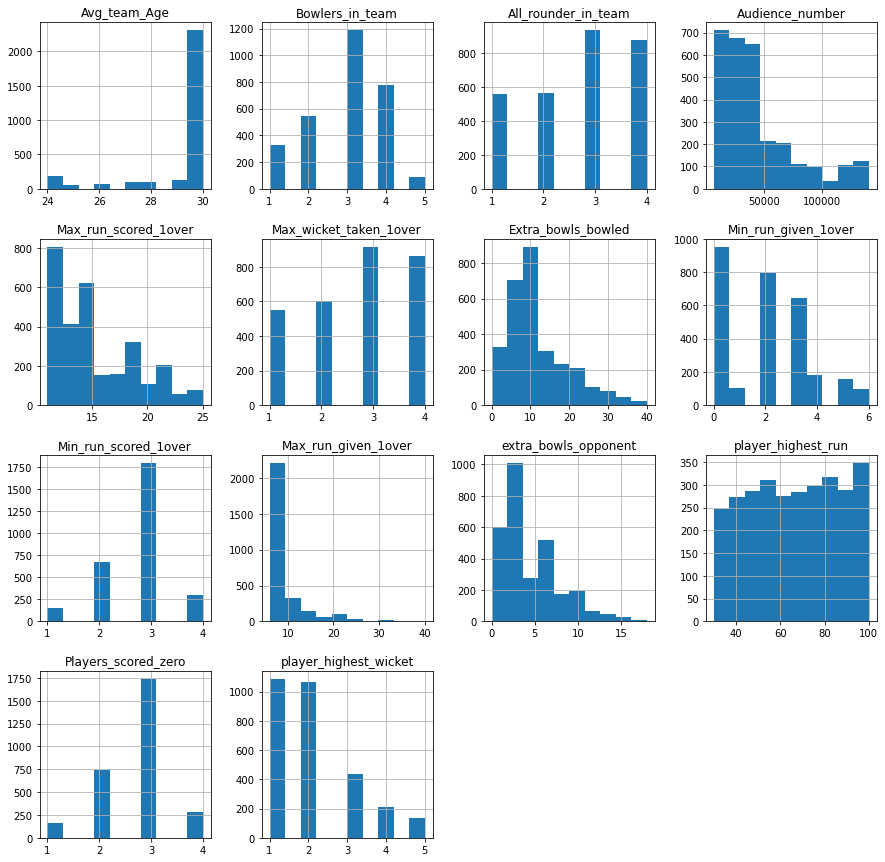

In [50]:
df_num_new.hist(figsize=(15,15));

In [93]:
df_num_new.skew()

Avg_team_Age             -2.204999
Bowlers_in_team          -0.303574
All_rounder_in_team      -0.335012
Audience_number           1.420102
Max_run_scored_1over      0.838907
Max_wicket_taken_1over   -0.305597
Extra_bowls_bowled        1.132432
Min_run_given_1over       0.433859
Min_run_scored_1over     -0.568821
Max_run_given_1over       2.692147
extra_bowls_opponent      0.916295
player_highest_run       -0.031472
Players_scored_zero      -0.505491
player_highest_wicket     1.026090
dtype: float64

* Since, the features now are not highly skewed so we can skip the transformation of particular features.

In [51]:
df_4=pd.read_csv('df_4.csv')

# 4. Model building


#### Encoding data 

In [52]:
df_encoded=df_4.copy()

In [53]:
df_encoded.drop('Unnamed: 0',axis=1,inplace=True)

In [54]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_team_Age            2930 non-null   float64
 1   Bowlers_in_team         2930 non-null   float64
 2   All_rounder_in_team     2930 non-null   float64
 3   Audience_number         2930 non-null   float64
 4   Max_run_scored_1over    2930 non-null   float64
 5   Max_wicket_taken_1over  2930 non-null   float64
 6   Extra_bowls_bowled      2930 non-null   float64
 7   Min_run_given_1over     2930 non-null   float64
 8   Min_run_scored_1over    2930 non-null   float64
 9   Max_run_given_1over     2930 non-null   float64
 10  extra_bowls_opponent    2930 non-null   float64
 11  player_highest_run      2930 non-null   float64
 12  Players_scored_zero     2930 non-null   float64
 13  player_highest_wicket   2930 non-null   float64
 14  Result                  2930 non-null   

In [55]:
for i in df_encoded.columns:
    if df_encoded[i].dtype== 'object':
        df_encoded[i]=pd.Categorical(df_encoded[i]).codes

#### Splitting the data in train and test data sets

In [56]:
x= df_encoded.drop('Result',axis= 1)
y= df_encoded.pop('Result')

In [57]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=1,test_size=.3)

#### Building Various Models

#### 1- Decision Tree Model

In [58]:
dt= DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

#### 2- ANN Model

* Scaling the data

In [59]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [60]:
ann= MLPClassifier(random_state=1)
ann.fit(x_train_scaled,y_train)

MLPClassifier(random_state=1)

#### 3- Logistic regression Model

In [61]:
logit = LogisticRegression(random_state=1)
logit.fit(x_train, y_train)

LogisticRegression(random_state=1)

#### 4- Linear Discriminant Model

In [62]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_scaled,y_train)

LinearDiscriminantAnalysis()

#### 5- KNN Model

In [63]:
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

#### 6- Naive Baye's Model

In [64]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

#### Testing model against the test set using various appropriate performance metrics 

In [65]:
y_train_pred_dt=dt.predict(x_train)
y_test_pred_dt=dt.predict(x_test)

In [66]:
y_train_pred_ann=ann.predict(x_train_scaled)
y_test_pred_ann=ann.predict(x_test_scaled)

In [67]:
y_train_pred_logit=logit.predict(x_train)
y_test_pred_logit=logit.predict(x_test)

In [68]:
y_train_pred_lda=lda.predict(x_train_scaled)
y_test_pred_lda=lda.predict(x_test_scaled)

In [69]:
y_train_pred_knn=knn.predict(x_train_scaled)
y_test_pred_knn=knn.predict(x_test_scaled)

In [70]:
y_train_pred_NB=NB.predict(x_train)
y_test_pred_NB=NB.predict(x_test)

#### Classification report, Confusion Matrics , ROC Curve and Auc Scores - Decision Tree Model

In [71]:
print('Classification report for train set:')
print(classification_report(y_train,y_train_pred_dt))
print('\n')
print('Classification report for test set:')
print(classification_report(y_test,y_test_pred_dt))

Classification report for train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



Classification report for test set:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       144
           1       0.97      0.94      0.96       735

    accuracy                           0.93       879
   macro avg       0.86      0.89      0.87       879
weighted avg       0.93      0.93      0.93       879



In [72]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_dt))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_dt))

Confusion Matrix for train set:
[[ 329    0]
 [   0 1722]]


Confusion Matrix for test set:
[[120  24]
 [ 41 694]]


AUC: 1.000


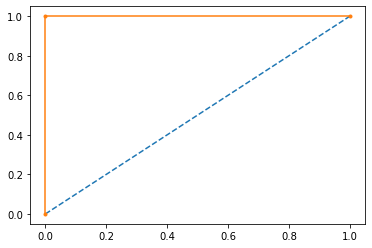

In [73]:
# AUC and ROC for the training data
probs = dt.predict_proba(x_train)
probs = probs[:, 1]
auc_train_dt = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_dt)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.889


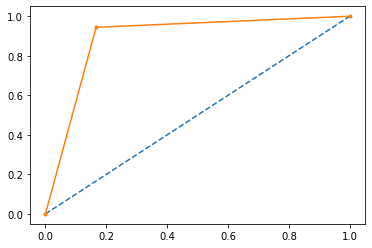

In [74]:
# AUC and ROC for the test data
probs = dt.predict_proba(x_test)
probs = probs[:, 1]
auc_test_dt = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Classification report, Confusion Matrics , ROC Curve and Auc Scores -ANN Model

In [75]:
print('Classification report for train set:')
print(classification_report(y_train,y_train_pred_ann))
print('\n')
print('Classification report for test set:')
print(classification_report(y_test,y_test_pred_ann))

Classification report for train set:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       329
           1       0.97      0.99      0.98      1722

    accuracy                           0.97      2051
   macro avg       0.96      0.92      0.94      2051
weighted avg       0.97      0.97      0.97      2051



Classification report for test set:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       144
           1       0.93      0.96      0.95       735

    accuracy                           0.91       879
   macro avg       0.84      0.80      0.82       879
weighted avg       0.90      0.91      0.90       879



In [76]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_ann))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_ann))

Confusion Matrix for train set:
[[ 276   53]
 [  15 1707]]


Confusion Matrix for test set:
[[ 93  51]
 [ 30 705]]


AUC: 0.991


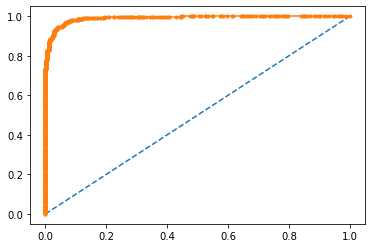

In [77]:
# AUC and ROC for the training data
probs = ann.predict_proba(x_train_scaled)
probs = probs[:, 1]
auc_train_ann = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_ann)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.914


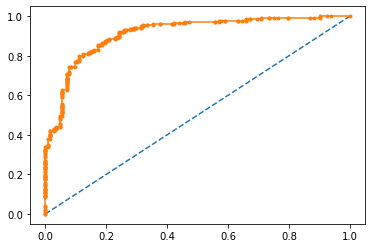

In [78]:
# AUC and ROC for the test data
probs = ann.predict_proba(x_test_scaled)
probs = probs[:, 1]
auc_test_ann = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_ann)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

####  Classification report, Confusion Matrics , ROC Curve and Auc Scores - Logistic Regression Model

In [79]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_logit))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_logit))


classification_report for train set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.42      0.50      0.46      2051
weighted avg       0.70      0.84      0.77      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.42      0.50      0.46       879
weighted avg       0.70      0.84      0.76       879



In [80]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_logit))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_logit))

Confusion Matrix for train set:
[[   0  329]
 [   0 1722]]


Confusion Matrix for test set:
[[  0 144]
 [  0 735]]


AUC: 0.669


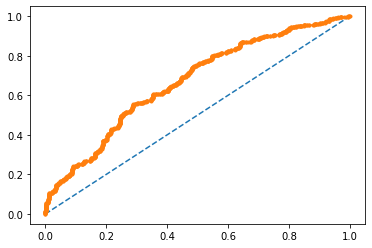

In [81]:
# AUC and ROC for the training data
probs = logit.predict_proba(x_train)
probs = probs[:, 1]
auc_train_logit = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_logit)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.685


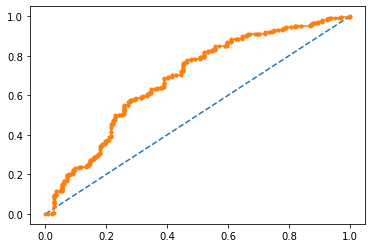

In [82]:
# AUC and ROC for the test data
probs = logit.predict_proba(x_test)
probs = probs[:, 1]
auc_test_logit = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_logit)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Classification report, Confusion Matrics , ROC Curve and Auc Scores - Linear Discriminant Model

In [83]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_lda))
print('\n')
print('classification_repor for test set:')
print(classification_report(y_test,y_test_pred_lda))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.68      0.24      0.35       329
           1       0.87      0.98      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.77      0.61      0.64      2051
weighted avg       0.84      0.86      0.83      2051



classification_repor for test set:
              precision    recall  f1-score   support

           0       0.62      0.24      0.34       144
           1       0.87      0.97      0.92       735

    accuracy                           0.85       879
   macro avg       0.74      0.60      0.63       879
weighted avg       0.83      0.85      0.82       879



In [84]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_lda))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_lda))

Confusion Matrix for train set:
[[  79  250]
 [  38 1684]]


Confusion Matrix for test set:
[[ 34 110]
 [ 21 714]]


AUC: 0.789


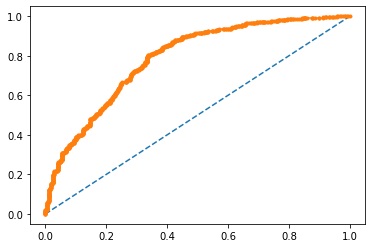

In [85]:
# AUC and ROC for the training data
probs = lda.predict_proba(x_train_scaled)
probs = probs[:, 1]
auc_train_lda = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_lda)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.737


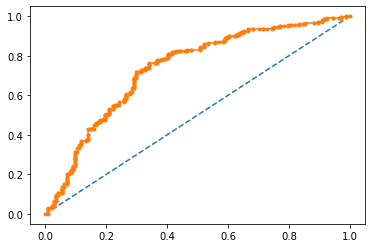

In [86]:
# AUC and ROC for the test data
probs = logit.predict_proba(x_test_scaled)
probs = probs[:, 1]
auc_test_lda = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_lda)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

####  Classification report, Confusion Matrics , ROC Curve and Auc Scores -  KNN Model

In [87]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_knn))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_knn))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.81      0.45      0.58       329
           1       0.90      0.98      0.94      1722

    accuracy                           0.89      2051
   macro avg       0.86      0.71      0.76      2051
weighted avg       0.89      0.89      0.88      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.62      0.35      0.45       144
           1       0.88      0.96      0.92       735

    accuracy                           0.86       879
   macro avg       0.75      0.65      0.68       879
weighted avg       0.84      0.86      0.84       879



In [88]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_knn))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_knn))

Confusion Matrix for train set:
[[ 147  182]
 [  34 1688]]


Confusion Matrix for test set:
[[ 50  94]
 [ 30 705]]


AUC: 0.942


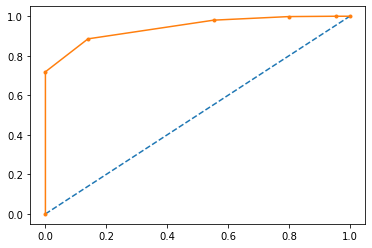

In [89]:
# AUC and ROC for the training data
probs = knn.predict_proba(x_train_scaled)
probs = probs[:, 1]
auc_train_knn = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_knn)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.843


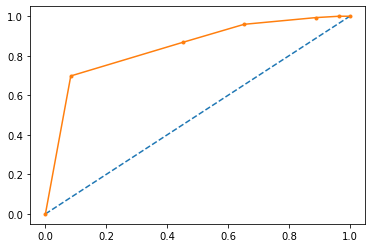

In [90]:
# AUC and ROC for the test data
probs = knn.predict_proba(x_test_scaled)
probs = probs[:, 1]
auc_test_knn = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Classification report, Confusion Matrics , ROC Curve and Auc Scores -  Naive Baye's Model

In [91]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_NB))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_NB))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.35      0.36      0.36       329
           1       0.88      0.88      0.88      1722

    accuracy                           0.79      2051
   macro avg       0.62      0.62      0.62      2051
weighted avg       0.79      0.79      0.79      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       144
           1       0.89      0.90      0.90       735

    accuracy                           0.83       879
   macro avg       0.69      0.68      0.68       879
weighted avg       0.83      0.83      0.83       879



In [92]:
print('Confusion Matrix for train set:')
print(confusion_matrix(y_train,y_train_pred_NB))
print('\n')
print('Confusion Matrix for test set:')
print(confusion_matrix(y_test,y_test_pred_NB))

Confusion Matrix for train set:
[[ 118  211]
 [ 215 1507]]


Confusion Matrix for test set:
[[ 65  79]
 [ 71 664]]


AUC: 0.701


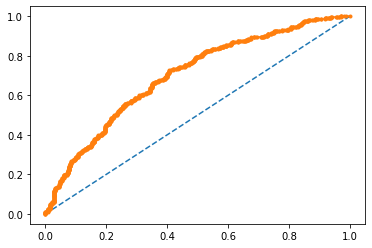

In [93]:
# AUC and ROC for the training data
probs = NB.predict_proba(x_train)
probs = probs[:, 1]
auc_train_NB = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_NB)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.732


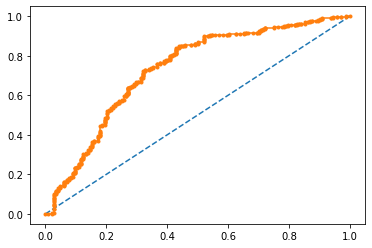

In [94]:
# AUC and ROC for the test data
probs = NB.predict_proba(x_test)
probs = probs[:, 1]
auc_test_NB = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_NB)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Model Tuning


##### 7-Tuning Decision Tree Model

In [96]:
param_dt = {
    'max_depth': [3,5,6,7],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [5,7,10],
}



grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_dt, cv = 3)
grid_search_dt.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [5, 7, 10]})

In [97]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, min_samples_split=5,
                       random_state=1)

In [98]:
best_grid_dt = grid_search_dt.best_estimator_
y_train_predict_dt_tuned = best_grid_dt.predict(x_train)
y_test_predict_dt_tuned = best_grid_dt.predict(x_test)

print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_dt_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_dt_tuned))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.74      0.35      0.48       329
           1       0.89      0.98      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.81      0.66      0.70      2051
weighted avg       0.86      0.88      0.86      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41       144
           1       0.88      0.96      0.92       735

    accuracy                           0.86       879
   macro avg       0.75      0.64      0.67       879
weighted avg       0.83      0.86      0.84       879



AUC: 0.825


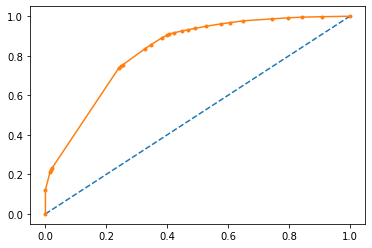

In [99]:
# AUC and ROC for the training data
probs = best_grid_dt.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_dt = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_dt)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.771


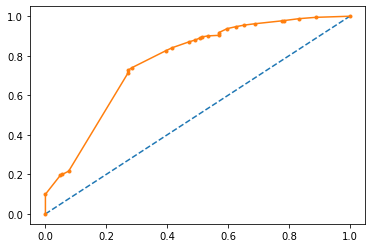

In [100]:
# AUC and ROC for the test data
probs = best_grid_dt.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_dt = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

##### 8-Logistic regression Model Tuning

In [101]:
param_logit = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logit_tuned = LogisticRegression(max_iter=150)
grid_search_logit = GridSearchCV(estimator = logit_tuned,param_grid = param_logit,cv=3)
grid_search_logit.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=150),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [102]:
grid_search_logit.best_estimator_

LogisticRegression(max_iter=150, solver='newton-cg')

In [103]:
best_grid_logit = grid_search_logit.best_estimator_
y_train_predict_logit_tuned = best_grid_logit.predict(x_train)
y_test_predict_logit_tuned= best_grid_logit.predict(x_test)

print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_logit_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_logit_tuned))



classification_report for train set:
              precision    recall  f1-score   support

           0       0.67      0.22      0.33       329
           1       0.87      0.98      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.77      0.60      0.62      2051
weighted avg       0.84      0.86      0.82      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29       144
           1       0.86      0.98      0.91       735

    accuracy                           0.85       879
   macro avg       0.73      0.58      0.60       879
weighted avg       0.82      0.85      0.81       879



AUC: 0.795


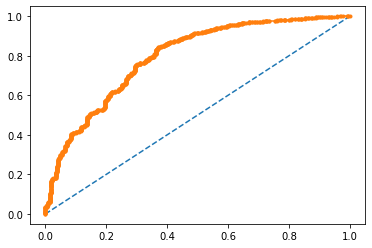

In [104]:
# AUC and ROC for the training data
probs = best_grid_logit.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_logit = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_logit)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.800


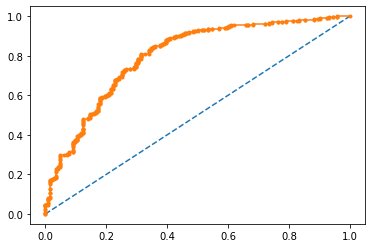

In [105]:
# AUC and ROC for the test data
probs = best_grid_logit.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_logit = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_logit)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

##### 9-LDA Model Tuning

In [106]:
params_LDA = {'solver':['svd','eigen','lsqr']}
grid_search_LDA = GridSearchCV(estimator = lda, param_grid = params_LDA, cv = 3,n_jobs=-1,verbose=2)
grid_search_LDA.fit(x_train_scaled,y_train)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'eigen', 'lsqr']}, verbose=2)

In [107]:
lda_tuned = grid_search_LDA.best_estimator_
lda_tuned

LinearDiscriminantAnalysis(solver='eigen')

In [108]:
y_train_predict_lda_tuned = lda_tuned.predict(x_train_scaled)
y_test_predict_lda_tuned= lda_tuned.predict(x_test_scaled)

print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_lda_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_lda_tuned))




classification_report for train set:
              precision    recall  f1-score   support

           0       0.68      0.24      0.35       329
           1       0.87      0.98      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.77      0.61      0.64      2051
weighted avg       0.84      0.86      0.83      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.62      0.24      0.34       144
           1       0.87      0.97      0.92       735

    accuracy                           0.85       879
   macro avg       0.74      0.60      0.63       879
weighted avg       0.83      0.85      0.82       879



AUC: 0.789


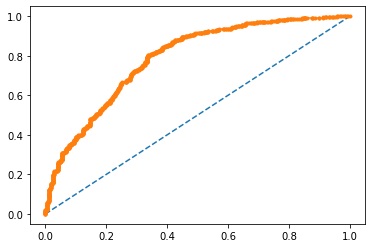

In [109]:
# AUC and ROC for the training data
probs = lda_tuned.predict_proba(x_train_scaled)
probs = probs[:, 1]
auc_train_tuned_lda = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_lda)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.800


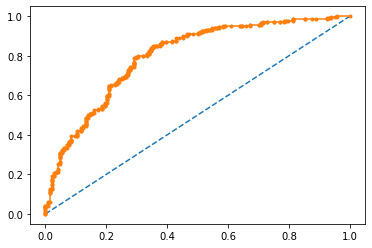

In [110]:
# AUC and ROC for the test data
probs = lda_tuned.predict_proba(x_test_scaled)
probs = probs[:, 1]
auc_test_tuned_lda = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_lda)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Ensemble models

#### 10-Ensemble RandomForest Classifier

In [111]:
rf= RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [112]:
y_train_pred_rf=rf.predict(x_train)
y_test_pred_rf=rf.predict(x_test)

In [113]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_rf))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_rf))

classification_report for train set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       144
           1       0.95      1.00      0.98       735

    accuracy                           0.96       879
   macro avg       0.97      0.88      0.92       879
weighted avg       0.96      0.96      0.96       879



AUC: 1.000


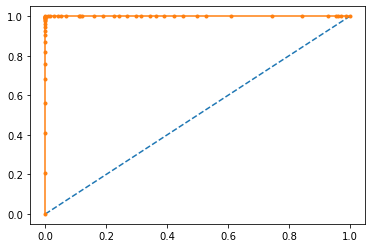

In [114]:
# AUC and ROC for the training data
probs = rf.predict_proba(x_train)
probs = probs[:, 1]
auc_train_rf = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_rf)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.974


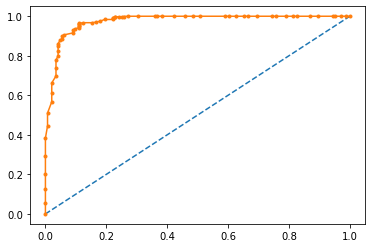

In [115]:
# AUC and ROC for the test data
probs = rf.predict_proba(x_test)
probs = probs[:, 1]
auc_test_rf = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 11-Bagging Model

In [116]:
bag = BaggingClassifier(random_state=1)
bag.fit(x_train, y_train)

BaggingClassifier(random_state=1)

In [117]:
y_train_pred_bag=bag.predict(x_train)
y_test_pred_bag=bag.predict(x_test)

In [118]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_bag))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_bag))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       144
           1       0.96      0.97      0.97       735

    accuracy                           0.94       879
   macro avg       0.90      0.89      0.89       879
weighted avg       0.94      0.94      0.94       879



AUC: 1.000


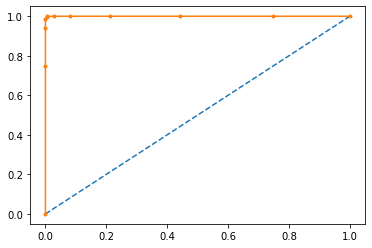

In [119]:
# AUC and ROC for the training data
probs = bag.predict_proba(x_train)
probs = probs[:, 1]
auc_train_bag = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_bag)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.955


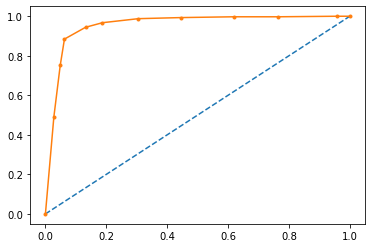

In [120]:
# AUC and ROC for the test data
probs = bag.predict_proba(x_test)
probs = probs[:, 1]
auc_test_bag = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_bag)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

####  12-AdaBoost Model

In [121]:
ada = AdaBoostClassifier(random_state=1)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [122]:
y_train_pred_ada=ada.predict(x_train)
y_test_pred_ada=ada.predict(x_test)

In [123]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_ada))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_ada))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.73      0.37      0.49       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.88      2051
   macro avg       0.81      0.67      0.71      2051
weighted avg       0.86      0.88      0.86      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.72      0.36      0.48       144
           1       0.89      0.97      0.93       735

    accuracy                           0.87       879
   macro avg       0.80      0.67      0.70       879
weighted avg       0.86      0.87      0.85       879



AUC: 0.876


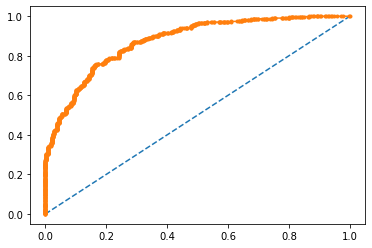

In [124]:
# AUC and ROC for the training data
probs = ada.predict_proba(x_train)
probs = probs[:, 1]
auc_train_ada = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_ada)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.848


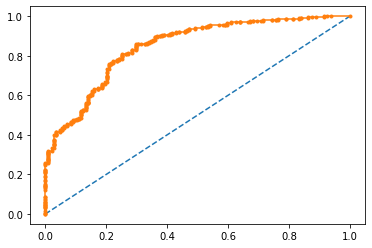

In [125]:
# AUC and ROC for the test data
probs = ada.predict_proba(x_test)
probs = probs[:, 1]
auc_test_ada = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 13-GradientBoost Model

In [126]:
gboost = GradientBoostingClassifier(random_state=1)
gboost.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [127]:
y_train_pred_gboost=gboost.predict(x_train)
y_test_pred_gboost=gboost.predict(x_test)

In [128]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_gboost))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_gboost))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       329
           1       0.92      0.99      0.96      1722

    accuracy                           0.92      2051
   macro avg       0.94      0.78      0.83      2051
weighted avg       0.93      0.92      0.92      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.82      0.43      0.56       144
           1       0.90      0.98      0.94       735

    accuracy                           0.89       879
   macro avg       0.86      0.71      0.75       879
weighted avg       0.88      0.89      0.88       879



AUC: 0.953


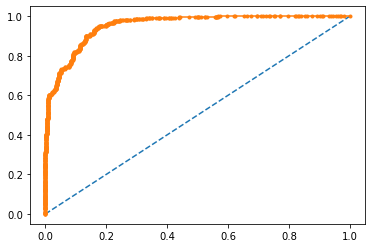

In [129]:
# AUC and ROC for the training data
probs = gboost.predict_proba(x_train)
probs = probs[:, 1]
auc_train_gboost = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_gboost)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.909


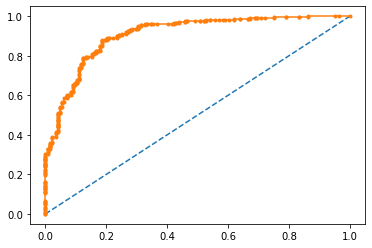

In [130]:
# AUC and ROC for the test data
probs = gboost.predict_proba(x_test)
probs = probs[:, 1]
auc_test_gboost = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_gboost)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Tuning various models

#### 14-Tuning Random Forest Model

In [131]:
param_grid = {
    'max_depth': [7,10,15],
    'max_features': [14,16,20],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [70],
    'n_estimators': [250]
}
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

In [132]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [7, 10, 15], 'max_features': [14, 16, 20],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [70], 'n_estimators': [250]})

In [133]:
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=10, max_features=16, min_samples_leaf=15,
                       min_samples_split=70, n_estimators=250, random_state=1)

In [134]:
best_grid_rf = grid_search_rf.best_estimator_
y_train_predict_rf_tuned = best_grid_rf.predict(x_train)
y_test_predict_rf_tuned = best_grid_rf.predict(x_test)

In [135]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_rf_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_rf_tuned))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.75      0.27      0.40       329
           1       0.88      0.98      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.81      0.63      0.66      2051
weighted avg       0.86      0.87      0.84      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.71      0.22      0.34       144
           1       0.87      0.98      0.92       735

    accuracy                           0.86       879
   macro avg       0.79      0.60      0.63       879
weighted avg       0.84      0.86      0.83       879



AUC: 0.906


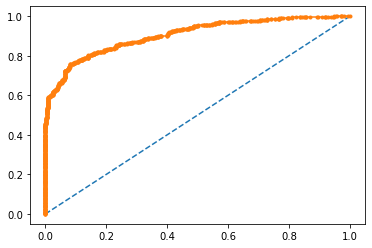

In [136]:
# AUC and ROC for the training data
probs = best_grid_rf.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_rf = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_rf)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.846


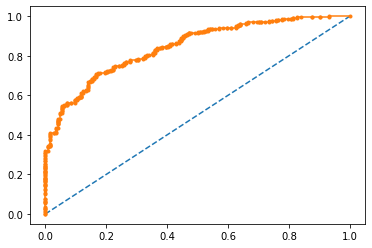

In [137]:
# AUC and ROC for the test data
probs = best_grid_rf.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_rf = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 15-Tuning Bagging Model

In [138]:
bag_tuned = BaggingClassifier(base_estimator=grid_search_dt,n_estimators=50)
bag_tuned.fit(x_train, y_train)

BaggingClassifier(base_estimator=GridSearchCV(cv=3,
                                              estimator=DecisionTreeClassifier(random_state=1),
                                              param_grid={'max_depth': [3, 5, 6,
                                                                        7],
                                                          'min_samples_leaf': [10,
                                                                               15,
                                                                               20],
                                                          'min_samples_split': [5,
                                                                                7,
                                                                                10]}),
                  n_estimators=50)

In [139]:
y_train_predict_bag_tuned = bag_tuned.predict(x_train)
y_test_predict_bag_tuned = bag_tuned.predict(x_test)

In [140]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_bag_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_bag_tuned))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       329
           1       0.90      0.99      0.94      1722

    accuracy                           0.90      2051
   macro avg       0.92      0.70      0.76      2051
weighted avg       0.91      0.90      0.88      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.75      0.28      0.41       144
           1       0.88      0.98      0.92       735

    accuracy                           0.87       879
   macro avg       0.81      0.63      0.67       879
weighted avg       0.85      0.87      0.84       879



AUC: 0.922


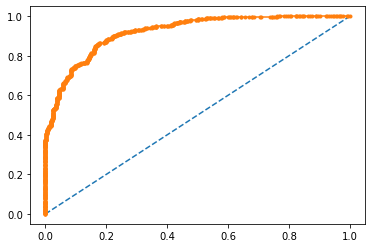

In [141]:
# AUC and ROC for the training data
probs = bag_tuned.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_bag = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_bag)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.861


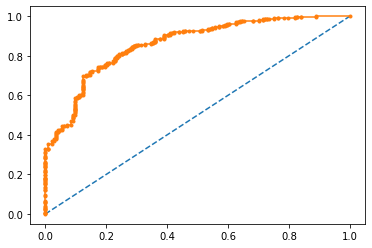

In [142]:
# AUC and ROC for the test data
probs = bag_tuned.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_bag = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_bag)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 16-Tuning GBoost Model

In [143]:
gboost_tuned = GradientBoostingClassifier(n_estimators = 70,max_depth=4,learning_rate=0.08)
gboost_tuned.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=0.08, max_depth=4, n_estimators=70)

In [144]:
y_train_pred_gboost_tuned=gboost_tuned.predict(x_train)
y_test_pred_gboost_tuned=gboost_tuned.predict(x_test)

In [145]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_pred_gboost_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_gboost_tuned))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.98      0.63      0.77       329
           1       0.93      1.00      0.96      1722

    accuracy                           0.94      2051
   macro avg       0.96      0.81      0.87      2051
weighted avg       0.94      0.94      0.93      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.87      0.48      0.62       144
           1       0.91      0.99      0.94       735

    accuracy                           0.90       879
   macro avg       0.89      0.73      0.78       879
weighted avg       0.90      0.90      0.89       879



AUC: 0.969


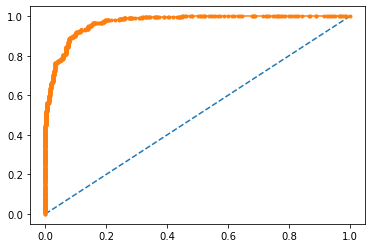

In [146]:
# AUC and ROC for the training data
probs = gboost_tuned.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_gboost = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_gboost)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.927


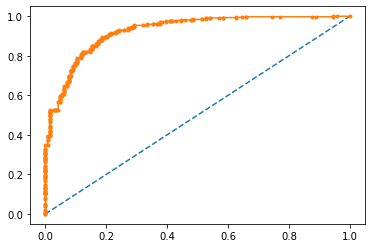

In [147]:
# AUC and ROC for the test data
probs = gboost_tuned.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_gboost = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_gboost)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### 17-Tuning AdaBoost Model

In [148]:
ada_tuned = AdaBoostClassifier(base_estimator=best_grid_rf,learning_rate=.2,n_estimators=50)
ada_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                         max_features=16,
                                                         min_samples_leaf=15,
                                                         min_samples_split=70,
                                                         n_estimators=250,
                                                         random_state=1),
                   learning_rate=0.2)

In [149]:
y_train_predict_ada_tuned = ada_tuned.predict(x_train)
y_test_predict_ada_tuned = ada_tuned.predict(x_test)

In [150]:
print('classification_report for train set:')
print(classification_report(y_train,y_train_predict_ada_tuned))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_predict_ada_tuned))

classification_report for train set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       329
           1       0.97      1.00      0.98      1722

    accuracy                           0.97      2051
   macro avg       0.98      0.92      0.95      2051
weighted avg       0.97      0.97      0.97      2051



classification_report for test set:
              precision    recall  f1-score   support

           0       0.90      0.49      0.63       144
           1       0.91      0.99      0.95       735

    accuracy                           0.91       879
   macro avg       0.90      0.74      0.79       879
weighted avg       0.91      0.91      0.89       879



AUC: 0.999


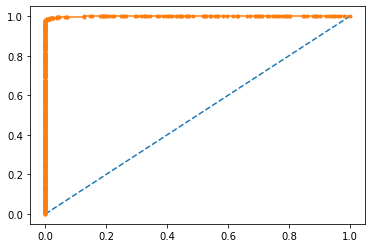

In [151]:
# AUC and ROC for the training data
probs = ada_tuned.predict_proba(x_train)
probs = probs[:, 1]
auc_train_tuned_ada = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc_train_tuned_ada)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.955


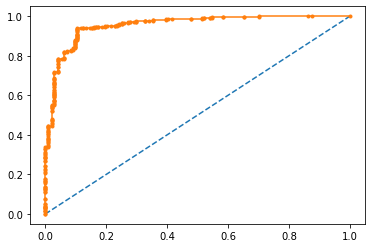

In [152]:
# AUC and ROC for the test data
probs = ada_tuned.predict_proba(x_test)
probs = probs[:, 1]
auc_test_tuned_ada = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc_test_tuned_ada)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## 3.1 Why was a particular model chosen

#### Comparing  performance of all the models

In [153]:
models = ['Decision Tree','Neural Networks','Logistic Regression','LDA','KNN','Naive Bayes','Tuned_Decisison_Tree','Tuned_Logit',
         'Tuned_LDA','Random Forest','Bagging','AdaBoost','GBoost','Tuned_Random_Forest','Tuned_Bag','Tuned_GBoost',
         'Tuned_AdaBoost']
acc_train=[]
acc_test=[]
pre_train=[]
pre_test=[]
rec_train=[]
rec_test=[]
f1_train=[]
f1_test=[]

train_pred = [y_train_pred_dt,y_train_pred_ann,y_train_pred_logit,y_train_pred_lda,y_train_pred_knn,y_train_pred_NB,y_train_predict_dt_tuned,
             y_train_predict_logit_tuned,y_train_predict_lda_tuned,y_train_pred_rf,y_train_pred_bag,y_train_pred_ada,y_train_pred_gboost,
             y_train_predict_rf_tuned,y_train_predict_bag_tuned,y_train_pred_gboost_tuned,y_train_predict_ada_tuned,
             ]

test_pred = [y_test_pred_dt,y_test_pred_ann,y_test_pred_logit,y_test_pred_lda,y_test_pred_knn,y_test_pred_NB,y_test_predict_dt_tuned,
            y_test_predict_logit_tuned,y_test_predict_lda_tuned,y_test_pred_rf,y_test_pred_bag,y_test_pred_ada,y_test_pred_gboost,
            y_test_predict_rf_tuned,y_test_predict_bag_tuned,y_test_pred_gboost_tuned,y_test_predict_ada_tuned,
            ]

for i in train_pred:
    acc_train.append(accuracy_score(y_train,i))
    pre_train.append(precision_score(y_train,i,zero_division=0))
    rec_train.append(recall_score(y_train,i))
    f1_train.append(f1_score(y_train,i))
    
for i in test_pred:
    acc_test.append(accuracy_score(y_test,i))
    pre_test.append(precision_score(y_test,i,zero_division=0))
    rec_test.append(recall_score(y_test,i))
    f1_test.append(f1_score(y_test,i))

Final_comparision = pd.DataFrame({'Model':models,'Accuracy_Train':acc_train,'Accuracy_Test':acc_test,'Precision_train':pre_train,
                                 'Precision_test':pre_test,'Recall_train':rec_train,'Recall_test':rec_test,'f1_train':f1_train,
                                 'f1_test':f1_test})
Final_comparision['AUC_train']=[auc_train_dt,auc_train_ann,auc_train_logit,auc_train_lda,auc_train_knn,auc_train_NB,
                                auc_train_tuned_dt,auc_train_tuned_logit,auc_train_tuned_lda,auc_train_rf,auc_train_bag,auc_train_ada,auc_train_gboost,
                                auc_train_tuned_rf,auc_train_tuned_bag,auc_train_tuned_gboost,auc_train_tuned_ada]
Final_comparision['AUC_test']=[auc_test_dt,auc_test_ann,auc_test_logit,auc_test_lda,auc_test_knn,auc_test_NB,auc_test_tuned_dt,auc_test_tuned_logit,auc_test_tuned_lda,auc_test_rf,auc_test_bag,auc_test_ada,auc_test_gboost,
                                auc_test_tuned_rf,auc_test_tuned_bag,auc_test_tuned_gboost,auc_test_tuned_ada]
Final_comparision.round(2) 

,Model,Accuracy_Train,Accuracy_Test,Precision_train,Precision_test,Recall_train,Recall_test,f1_train,f1_test,AUC_train,AUC_test
0,Decision Tree,1.00,0.93,1.00,0.97,1.00,0.94,1.00,0.96,1.00,0.89
1,Neural Networks,0.97,0.91,0.97,0.93,0.99,0.96,0.98,0.95,0.99,0.91
2,Logistic Regression,0.84,0.84,0.84,0.84,1.00,1.00,0.91,0.91,0.67,0.69
3,LDA,0.86,0.85,0.87,0.87,0.98,0.97,0.92,0.92,0.79,0.74
4,KNN,0.89,0.86,0.90,0.88,0.98,0.96,0.94,0.92,0.94,0.84
5,Naive Bayes,0.79,0.83,0.88,0.89,0.88,0.90,0.88,0.90,0.70,0.73
6,Tuned_Decisison_Tree,0.88,0.86,0.89,0.88,0.98,0.96,0.93,0.92,0.83,0.77
7,Tuned_Logit,0.86,0.85,0.87,0.86,0.98,0.98,0.92,0.91,0.80,0.80
8,Tuned_LDA,0.86,0.85,0.87,0.87,0.98,0.97,0.92,0.92,0.79,0.80
9,Random Forest,1.00,0.96,1.00,0.95,1.00,1.00,1.00,0.98,1.00,0.97


#### As we can notice from the comparision accuracy, precision, Recall, F1-score and AUC value,of various models, the best model seems to be Tuned_GBoost model ( Model no. 16).
* Hence we will try to improve it further and chosing this for further model analysis.

## 3.2 Effort to improve model performance.

#### Using Smote for balancing the data and applying to tuned GBoost model

In [154]:
from imblearn.over_sampling import SMOTE

In [155]:
sm=SMOTE(random_state=1)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

* Class details before using SMOTE

In [156]:
y_train.value_counts()

1    1722
0     329
Name: Result, dtype: int64

* Class details after using SMOTE

In [157]:
y_train_sm.value_counts()

0    1722
1    1722
Name: Result, dtype: int64

In [158]:
gboost_tuned_sm = GradientBoostingClassifier(n_estimators = 70,max_depth=4,learning_rate=0.08)
gboost_tuned_sm.fit(x_train_sm, y_train_sm )
y_train_pred_gboost_tuned_sm=gboost_tuned_sm.predict(x_train_sm)
y_test_pred_gboost_tuned_sm=gboost_tuned_sm.predict(x_test)

In [159]:
print('Accuracy score for train data',accuracy_score(y_train_sm,y_train_pred_gboost_tuned_sm).round(2))
print('Accuracy score for test data',accuracy_score(y_test,y_test_pred_gboost_tuned_sm).round(2))

Accuracy score for train data 0.95
Accuracy score for test data 0.87


In [160]:
print('classification_report for train set:')
print(classification_report(y_train_sm,y_train_pred_gboost_tuned_sm))
print('\n')
print('classification_report for test set:')
print(classification_report(y_test,y_test_pred_gboost_tuned_sm))


classification_report for train set:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1722
           1       0.92      0.97      0.95      1722

    accuracy                           0.95      3444
   macro avg       0.95      0.95      0.95      3444
weighted avg       0.95      0.95      0.95      3444



classification_report for test set:
              precision    recall  f1-score   support

           0       0.65      0.44      0.53       144
           1       0.90      0.95      0.92       735

    accuracy                           0.87       879
   macro avg       0.77      0.70      0.73       879
weighted avg       0.86      0.87      0.86       879



####  Since, after using SMOTE the accuracy of test data reduced from 90% to 87%,hence we would not use SMOTE and will go with our previously chosen tuned GBoost model for further predictions.

# 5. Model validation


#### Following metrices used for model validation;

* The accuracy for train and test data compared and thye model found to be neither underfitting nor over fitting.
* For this particular case study the precision is more important for us as we need to have low False Positives (i.e predicting that India is going to win and actually India looses the match)
* Precision,Recall, F1-score and AUC values are good for both train and test data set.
* ROC curves are good fitted for both train and test data set.

# 6. Final interpretation / recommendation


##### Predictions are to be made using following details;
1. 1 Test match with England in England. All the match are day matches. In England, it will be rainy season at the time to match.
2. 2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.
3. 2 ODI match with SriLanka in India. Allthe match are Day and Night matches. In India, it will be winter season at the time to match



### 6.1 Test match with England in England. All the match are day matches. In England, it will be rainy season at the time to match.

##### Note- We will first enter the rest of the match conditions/values by considering median/mode of all the Test matches played Offshore, in Rainy Season. If the winning predictions comes out to be low than we will try to change the various parameters/conditions.

* Getting statistical details of variables for test matches played offshore in Rainy season

In [161]:
df_4[(df_4['Offshore']=='Yes') & (df_4['Season']=='Rainy')& (df_4['Match_format']=='Test') ].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,10.0,NaN,NaN,NaN,1675.1,980.677934,279.0,959.5,1736.5,2500.5,2881.0
Avg_team_Age,10.0,NaN,NaN,NaN,29.2,1.686548,26.0,30.0,30.0,30.0,30.0
Bowlers_in_team,10.0,NaN,NaN,NaN,3.6,1.074968,2.0,3.0,4.0,4.0,5.0
All_rounder_in_team,10.0,NaN,NaN,NaN,3.0,1.154701,1.0,3.0,3.0,4.0,4.0
Audience_number,10.0,NaN,NaN,NaN,52952.2,45943.488241,15036.0,24290.0,40201.0,44429.0,137452.0
Max_run_scored_1over,10.0,NaN,NaN,NaN,14.0,3.887301,11.0,11.0,11.0,18.0,19.0
Max_wicket_taken_1over,10.0,NaN,NaN,NaN,2.6,1.074968,1.0,2.0,3.0,3.0,4.0
Extra_bowls_bowled,10.0,NaN,NaN,NaN,14.8,11.103553,6.0,7.0,12.0,14.0,35.0
Min_run_given_1over,10.0,NaN,NaN,NaN,2.0,1.154701,0.0,2.0,2.0,3.0,3.0
Min_run_scored_1over,10.0,NaN,NaN,NaN,2.6,0.843274,1.0,3.0,3.0,3.0,3.0


* Inputing the values of variables from above table and creating a dataframe for prediction

In [162]:
Match_light_type = 'Day'
Match_format = 'Test'
First_selection = 'Bowling'
Opponent = 'England'
Season = 'Rainy'
Offshore = 'Yes'
Avg_team_age = 30
Bowlers_in_team = 4
All_rounder_in_team = 3
Audience_number = 40201
Max_run_scored_1over = 11
Max_wicket_taken_1over = 3
Extra_bowls_bowled = 12
Min_run_given_1over = 2 
Min_run_scored_1over = 3
Max_run_given_1over = 10
extra_bowls_opponent = 7
player_highest_run = 69
Players_scored_zero = 3
player_highest_wicket = 2

In [163]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [164]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [165]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[0][1]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 86.34


#### Inferences;
Since, there are 86.34% chances of India winning the test match with England, playing in England, with all the above values. Hence, we will keep the values/conditions as feeded above. The Details are;
   * Match_light_type: Day
   * Match_format: Test
   * First_selection: Bowling
   * Opponent: England
   * Season: Rainy
   * Offshore: Yes
   * Avg_team_age: 30
   * Bowlers_in_team: 4
   * All_rounder_in_team: 3
   * Audience_number: 40201
   * Max_run_scored_1over: 11
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 12
   * Min_run_given_1over: 2
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 10
   * extra_bowls_opponent: 7
   * player_highest_run: 69
   * Players_scored_zero: 3
   * player_highest_wicket: 2


### 6.2 T20 match with Australia in India. All the match are Day and Night matches. In India, it will be winter season at the time to match.

#### Note- We will first enter the rest of the match conditions/values by considering median/mode of all the T20 matches played in India, in Winter Season. If the winning predictions comes out to be low than we will try to change the various parameters/conditions 

* Getting statistical details of variables for T20 matches played in India in Winter season

In [167]:
df_4[(df_4['Offshore']=='No') & (df_4['Season']=='Winter')& (df_4['Match_format']=='T20') ].describe(include='all')

,Unnamed: 0,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113,113,113,113,113,113,113
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,2,3,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Win,Day,T20,Bowling,South Africa,Winter,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,83,113,86,86,113,113
mean,1680.663717,29.716814,3.088496,2.663717,50191.982301,14.734513,2.946903,12.336283,0.0,2.805310,8.283186,4.539823,63.734513,2.716814,2.283186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,756.334731,1.030508,0.940721,1.122900,25620.892837,3.765486,1.007478,7.691148,0.0,0.638894,3.885571,3.984424,20.676513,0.761449,0.850095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,114.000000,24.000000,1.000000,1.000000,16079.000000,11.000000,1.000000,1.000000,0.0,1.000000,6.000000,0.000000,30.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1076.000000,30.000000,2.000000,2.000000,30821.000000,12.000000,3.000000,8.000000,0.0,2.000000,6.000000,2.000000,45.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1657.000000,30.000000,3.000000,3.000000,45073.000000,14.000000,3.000000,10.000000,0.0,3.000000,6.000000,3.000000,66.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2338.000000,30.000000,4.000000,4.000000,66675.000000,17.000000,4.000000,15.000000,0.0,3.000000,9.000000,7.000000,83.000000,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Inputing the values of variables from above table and creating a dataframe for prediction

In [168]:
Match_light_type ='Day and Night'
Match_format = 'T20'
First_selection = 'Bowling'
Opponent = 'Australia'
Season = 'Winter'
Offshore = 'No'
Avg_team_age = 30
Bowlers_in_team = 3
All_rounder_in_team = 3
Audience_number = 45073
Max_run_scored_1over = 14
Max_wicket_taken_1over = 3
Extra_bowls_bowled = 10
Min_run_given_1over = 0 
Min_run_scored_1over = 3
Max_run_given_1over = 6
extra_bowls_opponent = 3
player_highest_run = 66
Players_scored_zero = 3
player_highest_wicket = 2

In [169]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [170]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [171]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[0][1]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 75.03


Details of various variables feeded above are:

   * Match_light_type: Day and Night
   * Match_format: T20
   * First_selection: Bowling
   * Opponent: Australia
   * Season: Winter
   * Offshore: No
   * Avg_team_age: 30
   * Bowlers_in_team: 3
   * All_rounder_in_team: 3
   * Audience_number: 45073
   * Max_run_scored_1over: 14
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 10
   * Min_run_given_1over: 0
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 6
   * extra_bowls_opponent: 3
   * player_highest_run: 66
   * Players_scored_zero: 3
   * player_highest_wicket: 2

* The probability of winning in above conditions is 75.03%, 
* We will try changing some important features to increase the winning probabaility further.
* The changed features will provide us the strategies to be used for winning the match.

#### Strategy 1: (1st T20)
* Changing the number of All rounders playing in match from 3 to 1.
* Rest two postions of All rounders can be filled with specialist Batsmen.

In [172]:
Match_light_type ='Day and Night'
Match_format = 'T20'
First_selection = 'Bowling'
Opponent = 'Australia'
Season = 'Winter'
Offshore = 'No'
Avg_team_age = 30
Bowlers_in_team = 3
All_rounder_in_team = 1
Audience_number = 45073
Max_run_scored_1over = 14
Max_wicket_taken_1over = 3
Extra_bowls_bowled = 10
Min_run_given_1over = 0 
Min_run_scored_1over = 3
Max_run_given_1over = 6
extra_bowls_opponent = 3
player_highest_run = 66
Players_scored_zero = 3
player_highest_wicket = 2

In [173]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [174]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [175]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[0][1]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 76.89


* Now winning percentage is 76.89
* The winning percentage has increased nearly by 2% if India will play with only one all rounder and thus may include two more specialist Batsmen.
* So, the final parameters will be:

   * Match_light_type: Day and Night
   * Match_format: T20
   * First_selection: Bowling
   * Opponent: Australia
   * Season: Winter
   * Offshore: No
   * Avg_team_age: 30
   * Bowlers_in_team: 3
   * All_rounder_in_team: 1
   * Audience_number: 45073
   * Max_run_scored_1over: 14
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 10
   * Min_run_given_1over: 0
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 6
   * extra_bowls_opponent: 3
   * player_highest_run: 66
   * Players_scored_zero: 3
   * player_highest_wicket: 2

#### Strategy 2: (2nd T20)
* Changing the number minimum runs given per over to be changed from 0 to 5.
* This change points out that Indian bowlers should bowl for taking wickets and not for restricting runs.
* So, the motive shall be towards bowling out the opponent before playing all the overs.

In [176]:
Match_light_type = 'Day and Night'
Match_format = 'T20'
First_selection = 'Bowling'
Opponent = 'Australia'
Season = 'Winter'
Offshore = 'No'
Avg_team_age = 30 
Bowlers_in_team = 3 
All_rounder_in_team = 3 
Audience_number = 45073 
Max_run_scored_1over = 14 
Max_wicket_taken_1over = 3 
Extra_bowls_bowled = 10 
Min_run_given_1over = 5  
Min_run_scored_1over = 3 
Max_run_given_1over = 6 
extra_bowls_opponent = 3 
player_highest_run = 66 
Players_scored_zero = 3 
player_highest_wicket = 2

In [177]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [178]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [179]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[:,1][0]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 88.59


* The winning percentage has increased considerably if Indian bowlers are giving more runs, i.e minimum runs per over changed from 0 to 5.
* Thus, aggresive bowling will be the key strategy for second match.
* We will try to bowl out the opponent before 20 over which might result in increased minimum runs per over.

* So, the final parameters will be:

   * Match_light_type: Day and Night
   * Match_format: T20
   * First_selection: Bowling
   * Opponent: Australia
   * Season: Winter
   * Offshore: No
   * Avg_team_age: 30
   * Bowlers_in_team: 3
   * All_rounder_in_team: 2
   * Audience_number: 45073
   * Max_run_scored_1over: 14
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 10
   * Min_run_given_1over: 5
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 6
   * extra_bowls_opponent: 3
   * player_highest_run: 66
   * Players_scored_zero: 3
   * player_highest_wicket: 2

### 6.3 ODI match with SriLanka in India. All the match are Day and Night matches. In India, it will be winter season at the time to match

#### Note- We will first enter the rest of the match conditions/values by considering median/mode of all the ODI matches played in India, in Winter Season. If the winning predictions comes out to be low than we will try to change the various parameters/conditions.

* Getting statistical details of variables for ODI matches played in India in Winter season

In [180]:
df_4[(df_4['Offshore']=='No') & (df_4['Season']=='Winter')& (df_4['Match_format']=='ODI') ].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,324.0,NaN,NaN,NaN,1438.722222,826.642598,115.0,673.75,1408.0,2118.75,2913.0
Avg_team_Age,324.0,NaN,NaN,NaN,29.339506,1.499901,24.0,30.0,30.0,30.0,30.0
Bowlers_in_team,324.0,NaN,NaN,NaN,2.842593,0.955629,1.0,2.0,3.0,4.0,5.0
All_rounder_in_team,324.0,NaN,NaN,NaN,2.648148,1.172292,1.0,1.75,3.0,4.0,4.0
Audience_number,324.0,NaN,NaN,NaN,46494.712963,36164.680566,8918.0,19362.0,33754.0,60046.0,139811.0
Max_run_scored_1over,324.0,NaN,NaN,NaN,15.114198,3.524692,11.0,12.0,14.0,18.0,25.0
Max_wicket_taken_1over,324.0,NaN,NaN,NaN,2.617284,1.035804,1.0,2.0,3.0,3.0,4.0
Extra_bowls_bowled,324.0,NaN,NaN,NaN,11.317901,7.380892,1.0,6.0,10.0,15.0,33.0
Min_run_given_1over,324.0,NaN,NaN,NaN,2.802469,1.452401,0.0,2.0,3.0,3.0,6.0
Min_run_scored_1over,324.0,NaN,NaN,NaN,2.746914,0.706553,1.0,2.0,3.0,3.0,4.0


* Inputing the values of variables from above table and creating a dataframe for prediction

#### Strategy 1: For 1st ODI

In [181]:
Match_light_type = 'Day and Night'
Match_format = 'ODI'
First_selection = 'Bowling'
Opponent = 'SriLanka'
Season = 'Winter'
Offshore = 'No'
Avg_team_age = 30
Bowlers_in_team = 3
All_rounder_in_team = 3
Audience_number = 33754
Max_run_scored_1over = 14
Max_wicket_taken_1over = 3
Extra_bowls_bowled = 10
Min_run_given_1over = 3
Min_run_scored_1over = 3
Max_run_given_1over = 6
extra_bowls_opponent = 3
player_highest_run = 66
Players_scored_zero = 3
player_highest_wicket = 2

In [182]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [183]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [184]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[:,1][0]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 88.59


* So, the final parameters for 1st ODI will be:

   * Match_light_type: Day and Night
   * Match_format: ODI
   * First_selection: Bowling
   * Opponent: SriLanka
   * Season: Winter
   * Offshore: No
   * Avg_team_age: 30
   * Bowlers_in_team: 3
   * All_rounder_in_team: 3
   * Audience_number: 33754
   * Max_run_scored_1over: 10
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 10
   * Min_run_given_1over: 3
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 6
   * extra_bowls_opponent: 3
   * player_highest_run: 66
   * Players_scored_zero: 3
   * player_highest_wicket: 2

#### Strategy 2: For 2nd ODI
* Changing the all rounders in team from 3 to 1


In [185]:
Match_light_type = 'Day and Night'
Match_format = 'ODI'
First_selection = 'Bowling'
Opponent = 'SriLanka'
Season = 'Winter'
Offshore = 'No'
Avg_team_age = 30
Bowlers_in_team = 3
All_rounder_in_team = 1
Audience_number = 33754
Max_run_scored_1over = 14
Max_wicket_taken_1over = 3
Extra_bowls_bowled = 10
Min_run_given_1over = 3
Min_run_scored_1over = 3
Max_run_given_1over = 6
extra_bowls_opponent = 3
player_highest_run = 66
Players_scored_zero = 3
player_highest_wicket = 2

In [186]:
df_testing = pd.DataFrame({'Match_light_type':Match_light_type,
                       'Match_format':Match_format,
                       'First_selection':First_selection,
                       'Opponent': Opponent,
                       'Season': Season,
                       'Offshore':Offshore,
                       'Avg_team_age':Avg_team_age,
                       'Bowlers_in_team':Bowlers_in_team,
                       'All_rounder_in_team':All_rounder_in_team,
                       'Audience_number':Audience_number,
                       'Max_run_scored_1over':Max_run_scored_1over,
                       'Max_wicket_taken_1over':Max_wicket_taken_1over,
                       'Extra_bowls_bowled':Extra_bowls_bowled,
                       'Min_run_given_1over':Min_run_given_1over,
                       'Min_run_scored_1over':Min_run_scored_1over,
                       'Max_run_given_1over':Max_run_given_1over,
                       'extra_bowls_opponent':extra_bowls_opponent,
                       'player_highest_run':player_highest_run,
                       'Players_scored_zero':Players_scored_zero,
                       'player_highest_wicket':player_highest_wicket},index = [0])

In [187]:
for i in df_testing.columns:
    if df_testing[i].dtype== 'object':
        df_testing[i]=pd.Categorical(df_testing[i]).codes

In [188]:
probability_of_win = gboost_tuned.predict_proba(df_testing)[:,1][0]
print('Probability of win in above conditions :',(probability_of_win*100).round(2))

Probability of win in above conditions : 89.58


* The winning percentage further increased by reducing number of All rounders to 1 from 3. Thus, India can opt for two more specialist batsmen.
* So, the final parameters for 2nd ODI will be:

   * Match_light_type: Day and Night
   * Match_format: ODI
   * First_selection: Bowling
   * Opponent: SriLanka
   * Season: Winter
   * Offshore: No
   * Avg_team_age: 30
   * Bowlers_in_team: 3
   * All_rounder_in_team: 1
   * Audience_number: 33754
   * Max_run_scored_1over: 10
   * Max_wicket_taken_1over: 3
   * Extra_bowls_bowled: 10
   * Min_run_given_1over: 3
   * Min_run_scored_1over: 3
   * Max_run_given_1over: 6
   * extra_bowls_opponent: 3
   * player_highest_run: 66
   * Players_scored_zero: 3
   * player_highest_wicket: 2

## Thanks............